# Step 1 : Importing Necessary Library

In [38]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Step 2 : Importing the Dataset

In [39]:
# importing dataset

df = pd.read_csv('Cricket (1).csv', encoding = 'latin1')
df

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0          SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1   KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2          RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3       ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4    DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   
..                          ...        ...  ...   ...  ..    ...   ...    ...   
74            CG Greenidge (WI)  1975-1991  128   127  13   5134  133*  45.03   
75          Misbah-ul-Haq (PAK)  2002-2015  162   149  31   5122   96*  43.40   
76         PD Collingwood (ENG)  2001-2011  197   181  37   5092  120*  35.36   
77              A Symonds (AUS)  1998-2009  198   161  33   5088   156  39.75   
78      Abdul Razzaq (Asia/PAK)  1996-2011  265   228  57   5080   112  29.70   

       BF     SR  100  50   0  
0   21367  86.23   49  96  20  
1   18048  78.86   25  93  15  
2   17046  80.39   30  82  20  
3   14725  91.20   28  68  34  
4   16020  78.96   19  77  28  
..    ...    ...  ...  ..  ..  
74   7908  64.92   11  31   3  
75   6945  73.75    0  42   6  
76   6614  76.98    5  26   7  
77   5504  92.44    6  30  15  
78   6252  81.25    3  23  14  

[79 rows x 13 columns]

# Inference
1. There is a probability to extract the start year and end year from the Span Column


# Step 3 : Data Inspection

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


As observer span columns is an object columns, so in order to convert the span into year of experience, we will first split it and then we will put the data into separate column.

In [41]:
# creating two new columns and splitting the data
df[['Start', 'End']] = df.Span.str.split("-", expand = True)

In [42]:
df

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0          SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1   KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2          RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3       ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4    DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   
..                          ...        ...  ...   ...  ..    ...   ...    ...   
74            CG Greenidge (WI)  1975-1991  128   127  13   5134  133*  45.03   
75          Misbah-ul-Haq (PAK)  2002-2015  162   149  31   5122   96*  43.40   
76         PD Collingwood (ENG)  2001-2011  197   181  37   5092  120*  35.36   
77              A Symonds (AUS)  1998-2009  198   161  33   5088   156  39.75   
78      Abdul Razzaq (Asia/PAK)  1996-2011  265   228  57   5080   112  29.70   

       BF     SR  100  50   0 Start   End  
0   21367  86.23   49  96  20  1989  2012  
1   18048  78.86   25  93  15  2000  2015  
2   17046  80.39   30  82  20  1995  2012  
3   14725  91.20   28  68  34  1989  2011  
4   16020  78.96   19  77  28  1998  2015  
..    ...    ...  ...  ..  ..   ...   ...  
74   7908  64.92   11  31   3  1975  1991  
75   6945  73.75    0  42   6  2002  2015  
76   6614  76.98    5  26   7  2001  2011  
77   5504  92.44    6  30  15  1998  2009  
78   6252  81.25    3  23  14  1996  2011  

[79 rows x 15 columns]

In [43]:
df['Start'].dtype

dtype('O')

# As Start and End columns are object so we need to convert into integer and then we will find the years of experience

# YOE = End Year - Start Year

In [44]:
df[['Start', 'End']] = df[['Start', 'End']].astype(int)   # Conversion

df['Experience'] = df['End'] - df['Start']  # Grab the years of experience

# now dropping the Span, Start, End columns

df = df.drop(['Start', 'End', 'Span'], axis ='columns')
df

Player  Mat  Inns  NO   Runs    HS    Ave     BF  \
0          SR Tendulkar (INDIA)  463   452  41  18426  200*  44.83  21367   
1   KC Sangakkara (Asia/ICC/SL)  404   380  41  14234   169  41.98  18048   
2          RT Ponting (AUS/ICC)  375   365  39  13704   164  42.03  17046   
3       ST Jayasuriya (Asia/SL)  445   433  18  13430   189  32.36  14725   
4    DPMD Jayawardene (Asia/SL)  448   418  39  12650   144  33.37  16020   
..                          ...  ...   ...  ..    ...   ...    ...    ...   
74            CG Greenidge (WI)  128   127  13   5134  133*  45.03   7908   
75          Misbah-ul-Haq (PAK)  162   149  31   5122   96*  43.40   6945   
76         PD Collingwood (ENG)  197   181  37   5092  120*  35.36   6614   
77              A Symonds (AUS)  198   161  33   5088   156  39.75   5504   
78      Abdul Razzaq (Asia/PAK)  265   228  57   5080   112  29.70   6252   

       SR  100  50   0  Experience  
0   86.23   49  96  20          23  
1   78.86   25  93  15          15  
2   80.39   30  82  20          17  
3   91.20   28  68  34          22  
4   78.96   19  77  28          17  
..    ...  ...  ..  ..         ...  
74  64.92   11  31   3          16  
75  73.75    0  42   6          13  
76  76.98    5  26   7          10  
77  92.44    6  30  15          11  
78  81.25    3  23  14          15  

[79 rows x 13 columns]

In [45]:
df['Experience'].value_counts()

11    10
17     9
15     8
16     8
14     8
10     8
12     7
13     7
8      4
18     3
19     2
9      2
23     1
22     1
21     1
Name: Experience, dtype: int64

# Inference:
1. Most of the players are having experience between the 10-17years

In [46]:
# Lets find something wrong with HS column as it is object, because there is * marks

In [47]:
# creating a new df and not disturbing our old dataframe

df2 = df.HS
df2

0     200*
1      169
2      164
3      189
4      144
      ... 
74    133*
75     96*
76    120*
77     156
78     112
Name: HS, Length: 79, dtype: object

In [48]:
# converting in to string

df2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

# Observation: We can see there are lots of * marks are there

In [49]:
# we will do the same operation here as well , we will go ahead and split the data with the *
# and drop the extra values and will keep the HS

In [50]:
df[['HS', 'Extra']] = df['HS'].str.split('*', expand = True )

In [51]:
df

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0          SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1   KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2          RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3       ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4    DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   
..                          ...  ...   ...  ..    ...  ...    ...    ...   
74            CG Greenidge (WI)  128   127  13   5134  133  45.03   7908   
75          Misbah-ul-Haq (PAK)  162   149  31   5122   96  43.40   6945   
76         PD Collingwood (ENG)  197   181  37   5092  120  35.36   6614   
77              A Symonds (AUS)  198   161  33   5088  156  39.75   5504   
78      Abdul Razzaq (Asia/PAK)  265   228  57   5080  112  29.70   6252   

       SR  100  50   0  Experience Extra  
0   86.23   49  96  20          23        
1   78.86   25  93  15          15  None  
2   80.39   30  82  20          17  None  
3   91.20   28  68  34          22  None  
4   78.96   19  77  28          17  None  
..    ...  ...  ..  ..         ...   ...  
74  64.92   11  31   3          16        
75  73.75    0  42   6          13        
76  76.98    5  26   7          10        
77  92.44    6  30  15          11  None  
78  81.25    3  23  14          15  None  

[79 rows x 14 columns]

In [52]:
df.HS.dtype

dtype('O')

In [53]:
# Now we will drop Extra column

df = df.drop(['Extra'],axis= 'columns')

In [54]:
#Converting the HS in to integer

df['HS'] = df.HS.astype(int)

In [55]:
df.HS.dtype

dtype('int64')

In [56]:
df

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0          SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1   KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2          RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3       ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4    DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   
..                          ...  ...   ...  ..    ...  ...    ...    ...   
74            CG Greenidge (WI)  128   127  13   5134  133  45.03   7908   
75          Misbah-ul-Haq (PAK)  162   149  31   5122   96  43.40   6945   
76         PD Collingwood (ENG)  197   181  37   5092  120  35.36   6614   
77              A Symonds (AUS)  198   161  33   5088  156  39.75   5504   
78      Abdul Razzaq (Asia/PAK)  265   228  57   5080  112  29.70   6252   

       SR  100  50   0  Experience  
0   86.23   49  96  20          23  
1   78.86   25  93  15          15  
2   80.39   30  82  20          17  
3   91.20   28  68  34          22  
4   78.96   19  77  28          17  
..    ...  ...  ..  ..         ...  
74  64.92   11  31   3          16  
75  73.75    0  42   6          13  
76  76.98    5  26   7          10  
77  92.44    6  30  15          11  
78  81.25    3  23  14          15  

[79 rows x 13 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  Experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.2+ KB


# Step 4: Explanatory Data Analysis (EDA)

In [58]:
# data management and cleaning

In [59]:
# Checking null values
df.isnull().sum()

Player        0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
Experience    0
dtype: int64

In [60]:
df.shape

(79, 13)

In [61]:
# duplicates

df[df.duplicated()].sum()

Player        0.0
Mat           0.0
Inns          0.0
NO            0.0
Runs          0.0
HS            0.0
Ave           0.0
BF            0.0
SR            0.0
100           0.0
50            0.0
0             0.0
Experience    0.0
dtype: float64

# The data is free from NaN values and Duplicated values
So there is no need for replacement or dropping of the data

# Step 5: Data Visualization

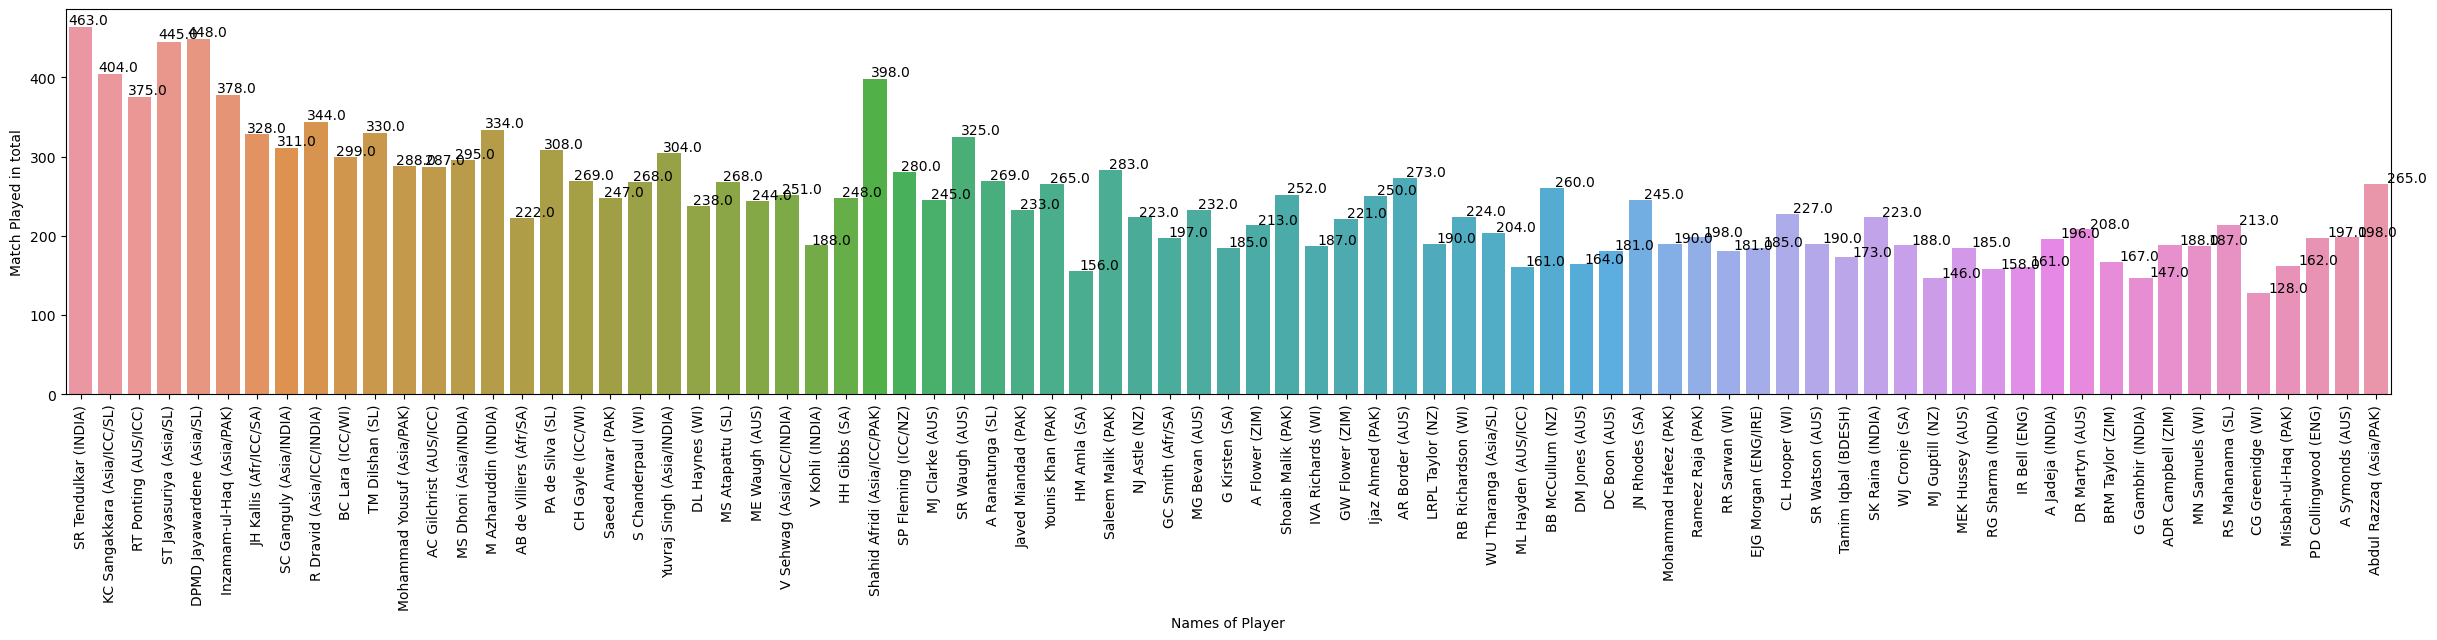

In [72]:
# 1. Players vs Match

plt.figure(figsize= (30,5))  # size of the canvas
mat = df[['Player', 'Mat']]  # dataframe = mat that stores the values of players and matches being played by them
ax = sns.barplot(x = 'Player' , y = 'Mat', data = mat)  # using seaborn, plotting the data

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x()*1.01, i.get_height()*1.01))  # putting the height values

ax.set(xlabel = "Names of Player", ylabel = 'Match Played in total') # setting the values for axes
plt.xticks(rotation = 90) # rotating the names with respect to 90 degree
plt.show() # showing the canvas

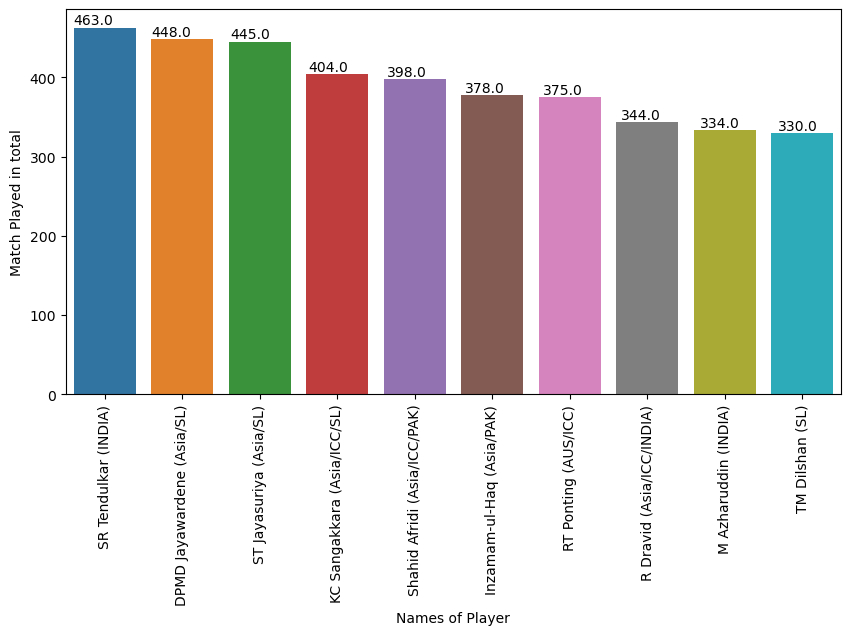

In [71]:
# 2. Top 10 Players
plt.figure(figsize= (10,5))  # size of the canvas
mat_top10 = df[['Player', 'Mat']].sort_values('Mat', ascending = False).head(10)  #sorting the dataframe in descending order to get the top 10 value
ax = sns.barplot(x = 'Player' , y = 'Mat', data = mat_top10)  # using seaborn, plotting the data

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x()*1.01, i.get_height()*1.01)) # putting the height values

ax.set(xlabel = "Names of Player", ylabel = 'Match Played in total') # setting the values for axes
plt.xticks(rotation = 90) # rotating the names with respect to 90 degree
plt.show() # showing the canvas

In [73]:
# we plot each player on each columns

In [76]:
col_list = df.columns
col_list

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Experience'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Mat         79 non-null     int64  
 2   Inns        79 non-null     int64  
 3   NO          79 non-null     int64  
 4   Runs        79 non-null     int64  
 5   HS          79 non-null     int64  
 6   Ave         79 non-null     float64
 7   BF          79 non-null     int64  
 8   SR          79 non-null     float64
 9   100         79 non-null     int64  
 10  50          79 non-null     int64  
 11  0           79 non-null     int64  
 12  Experience  79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.2+ KB


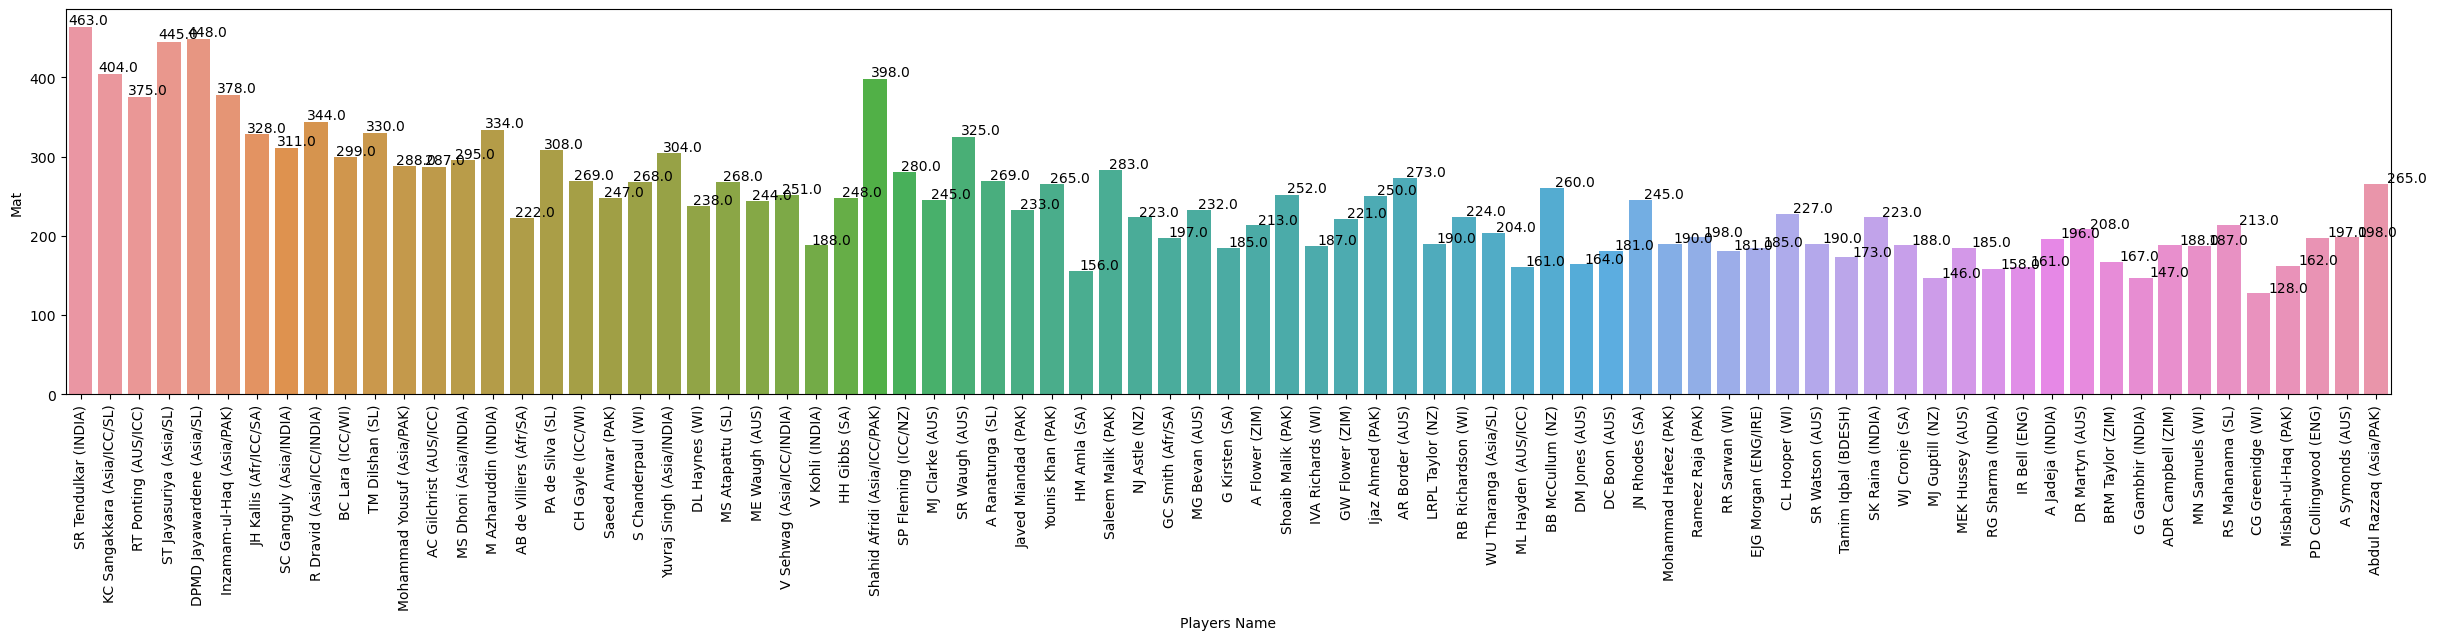

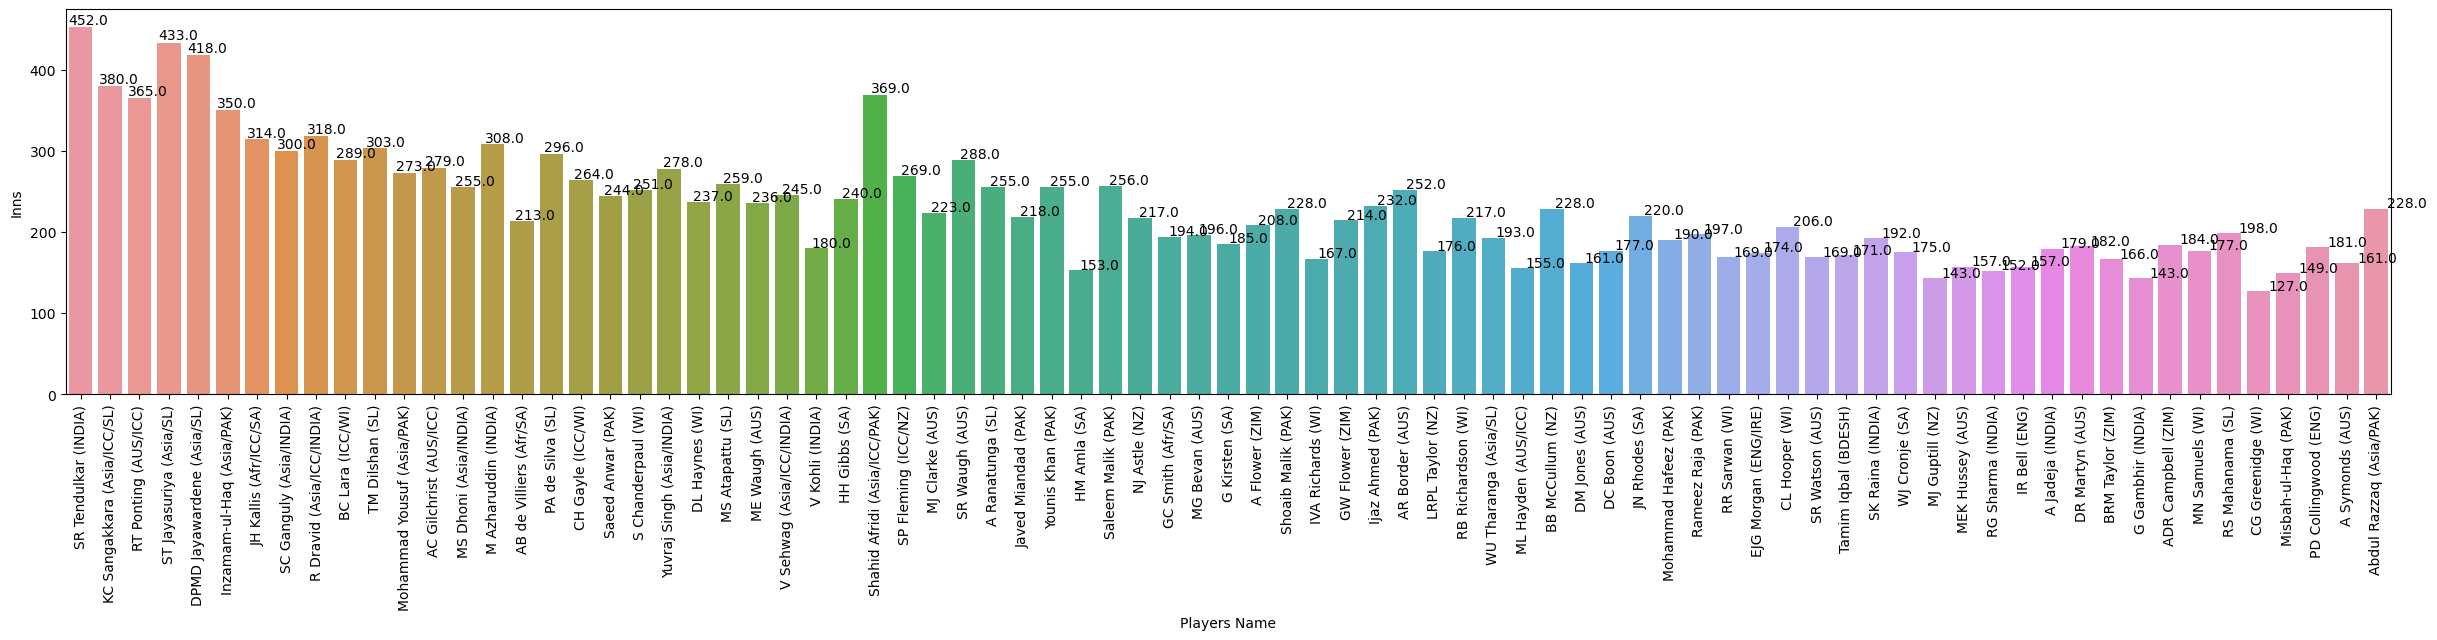

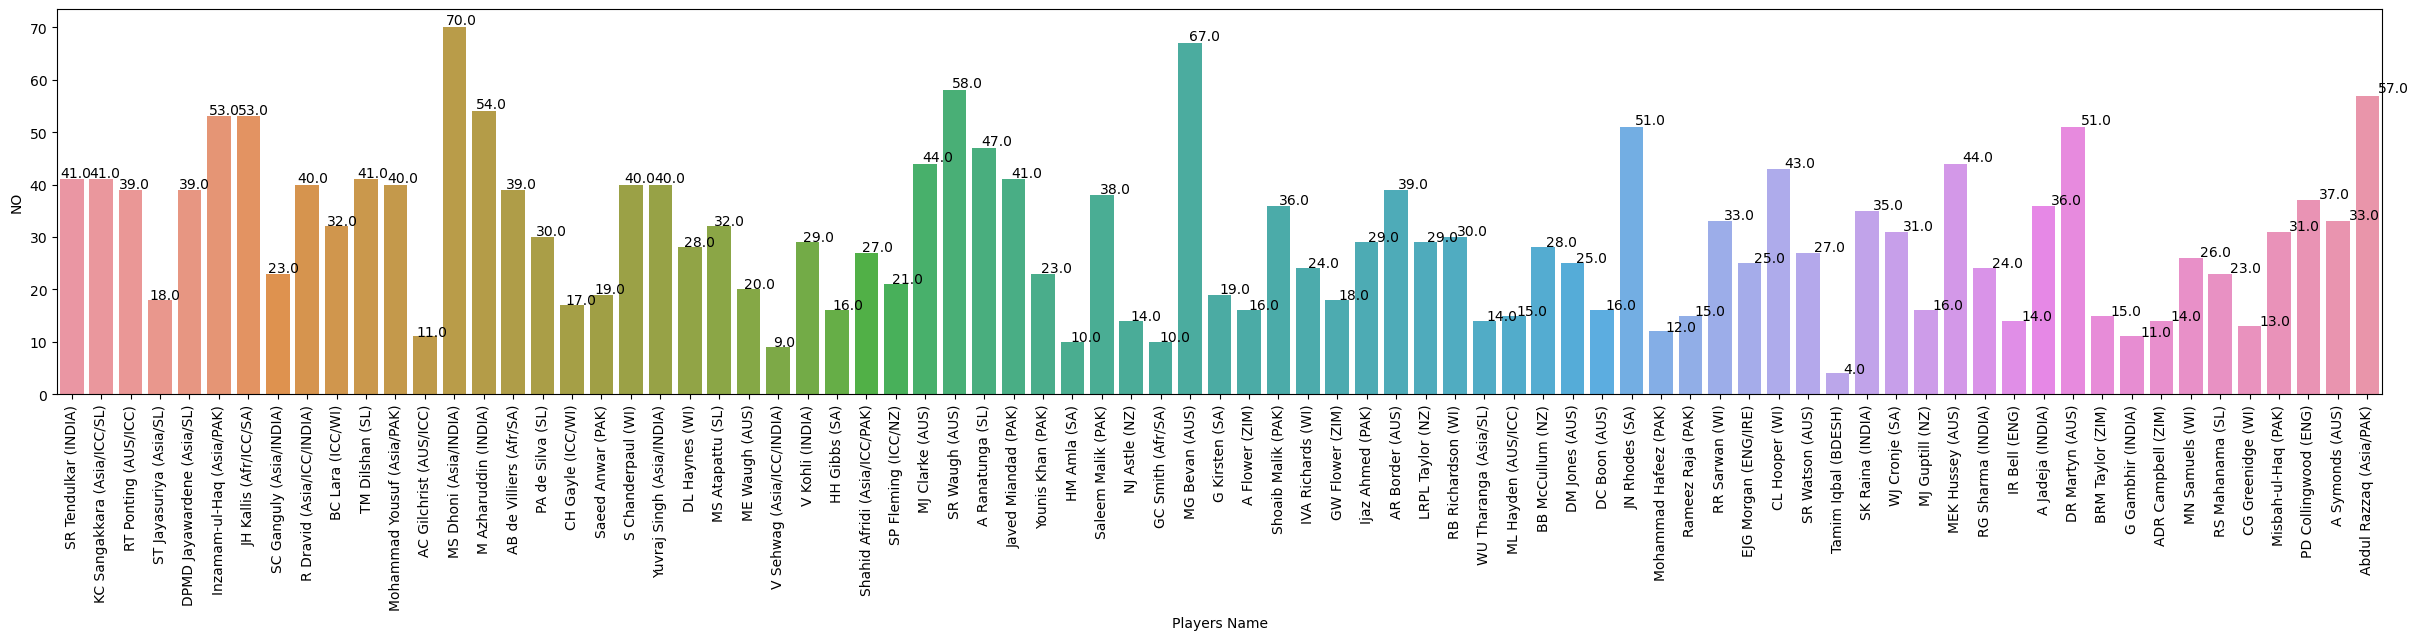

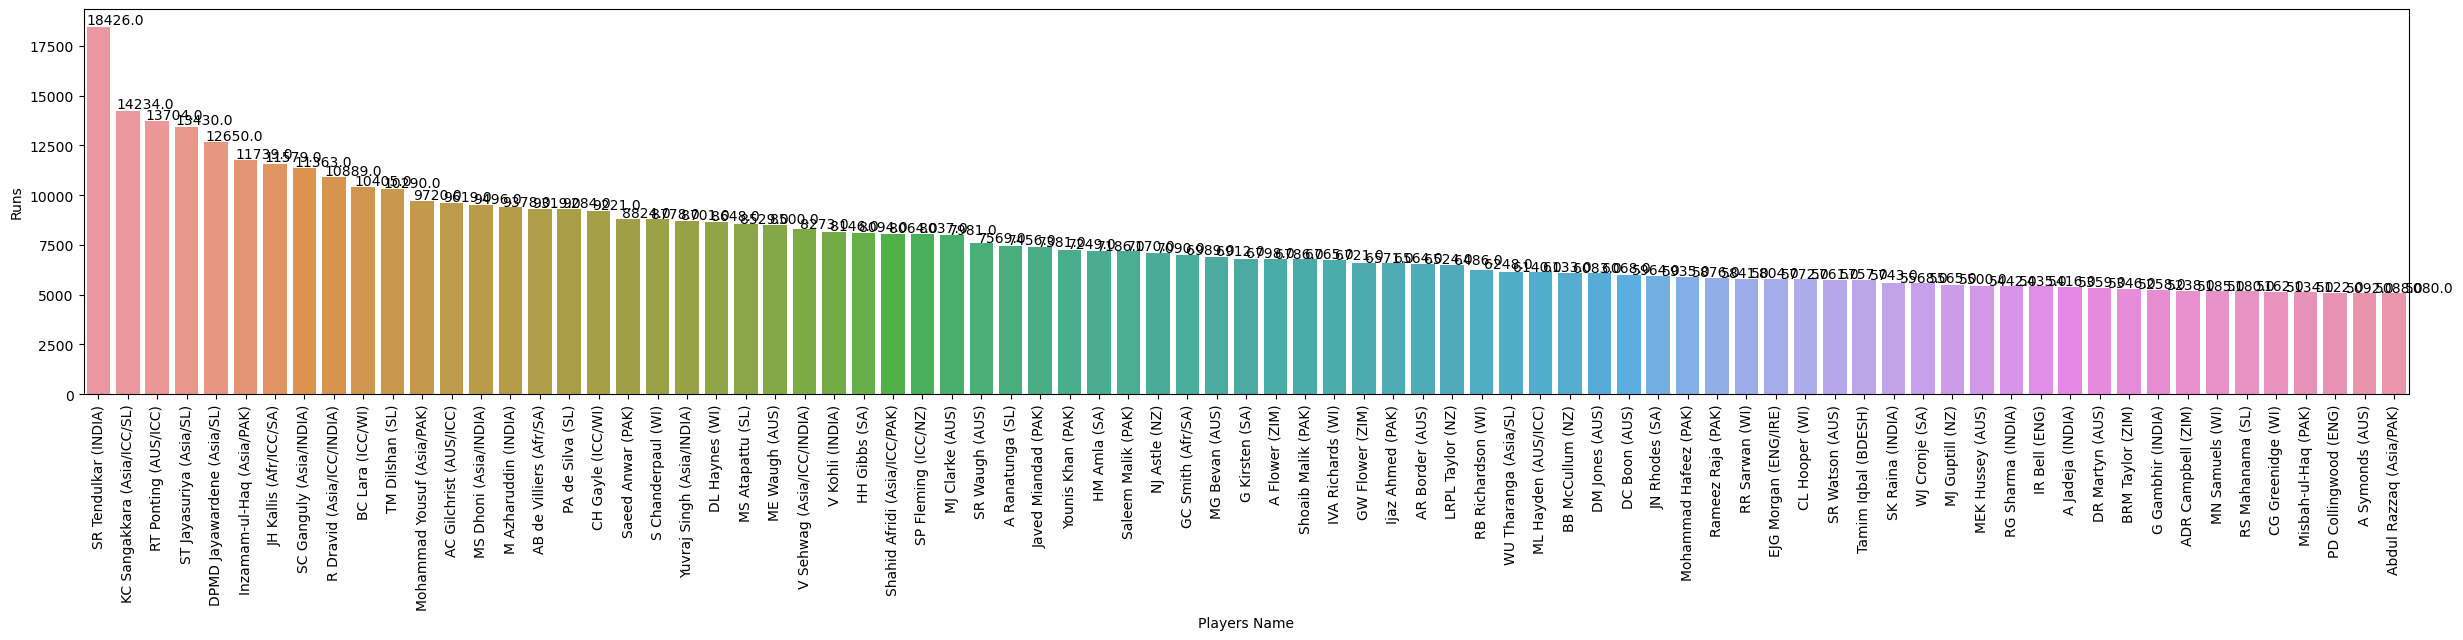

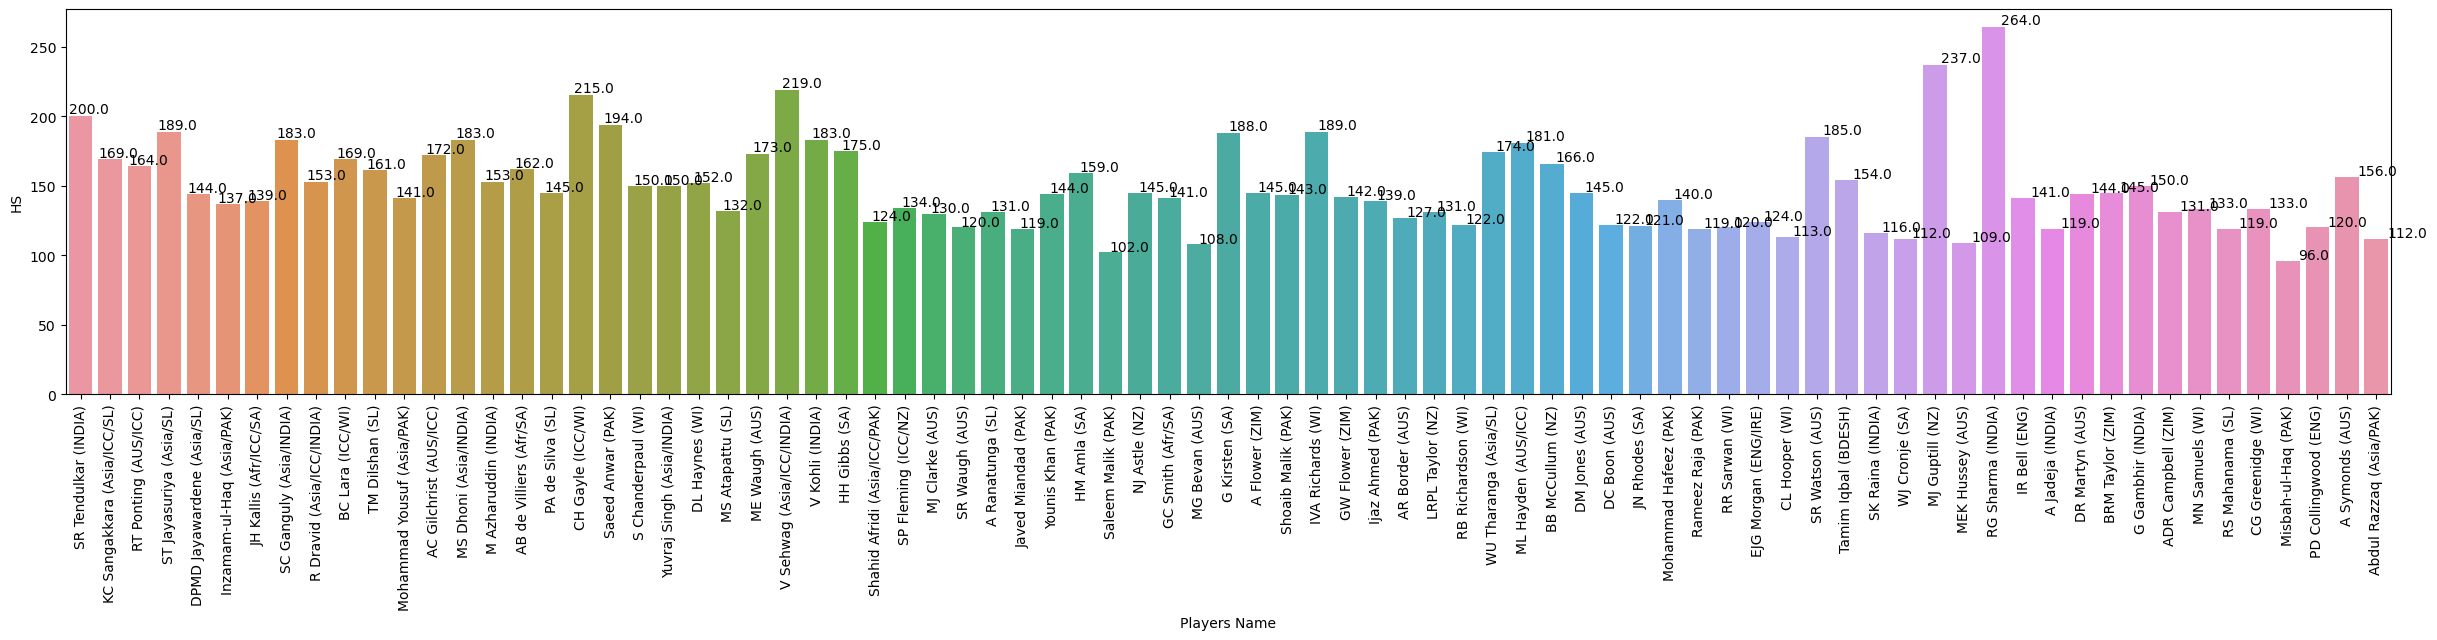

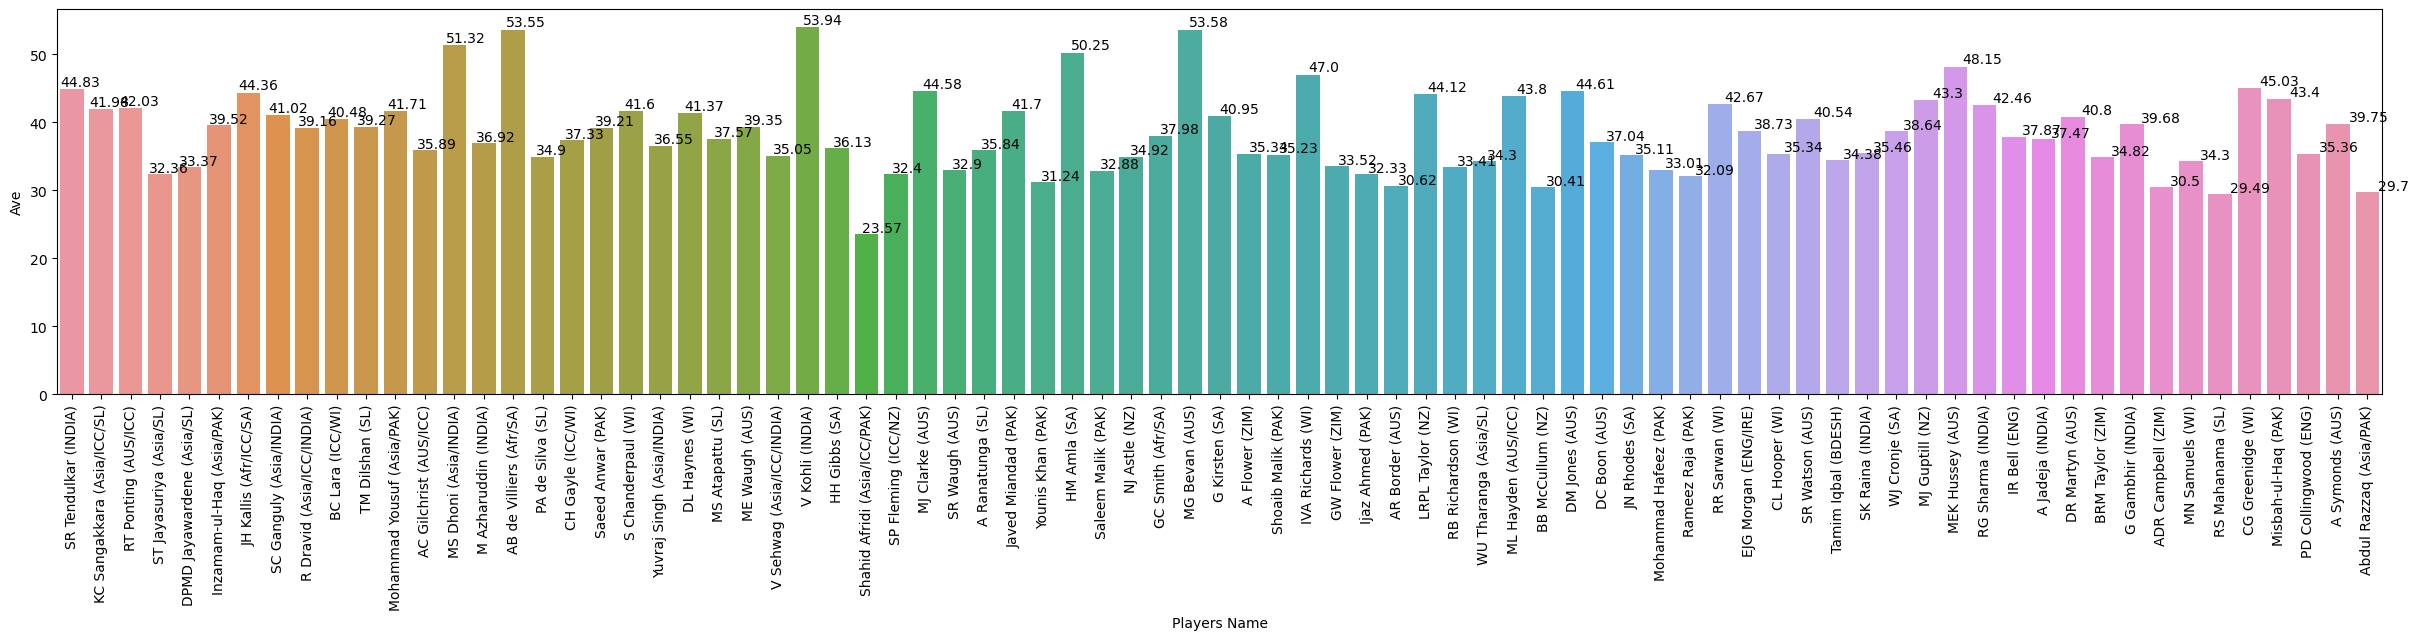

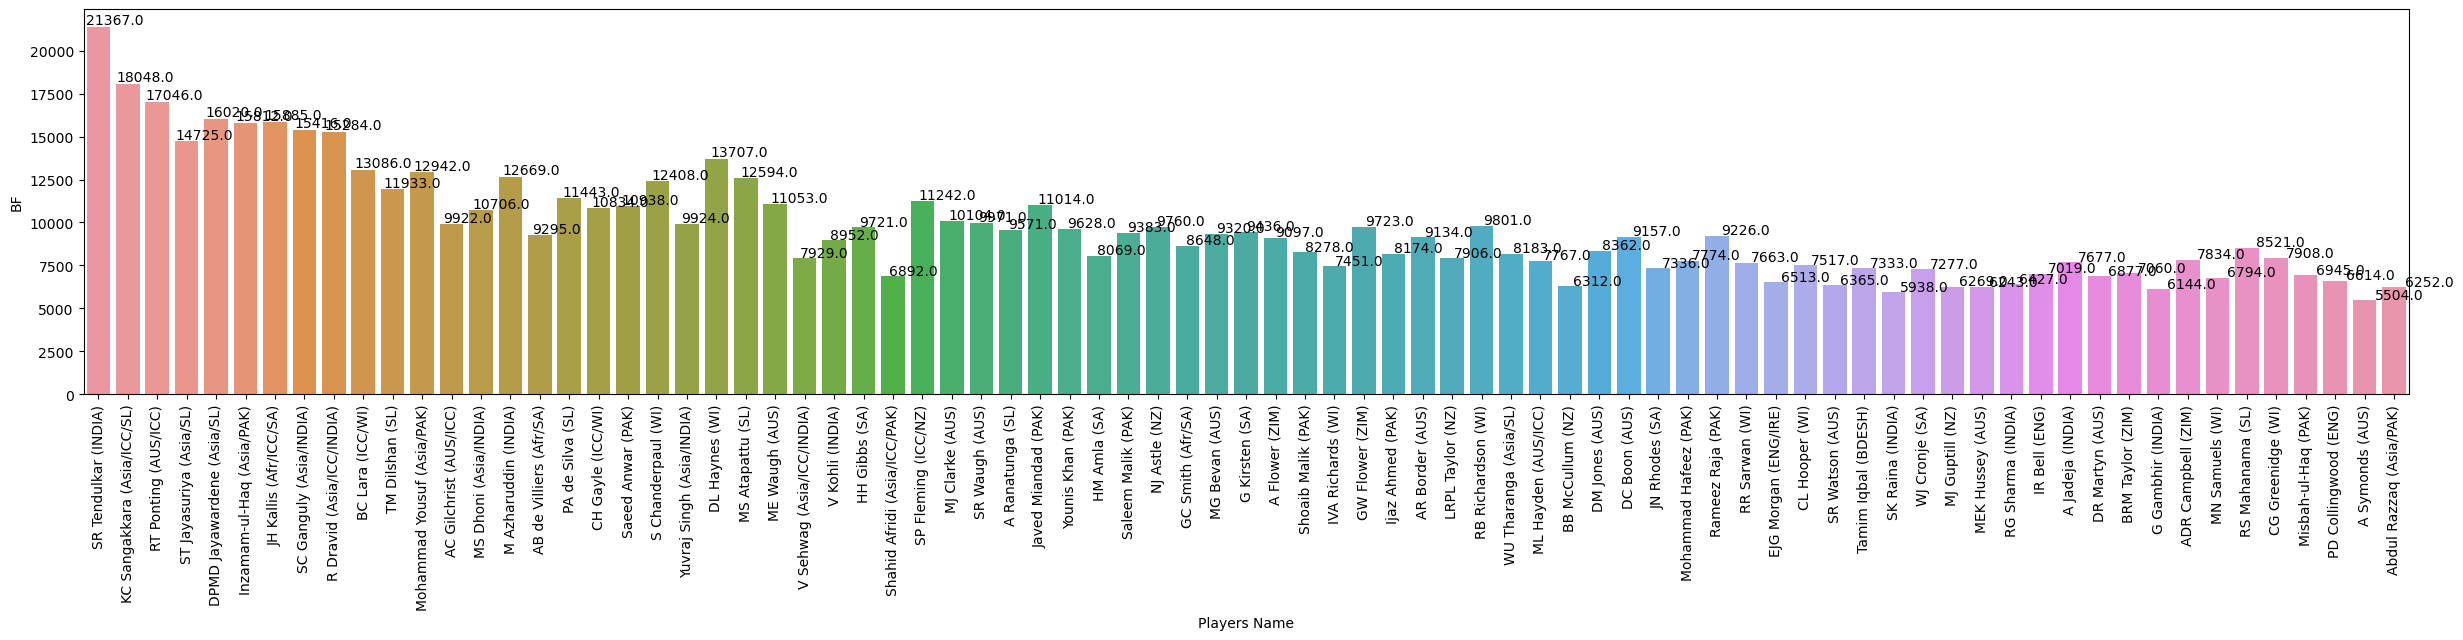

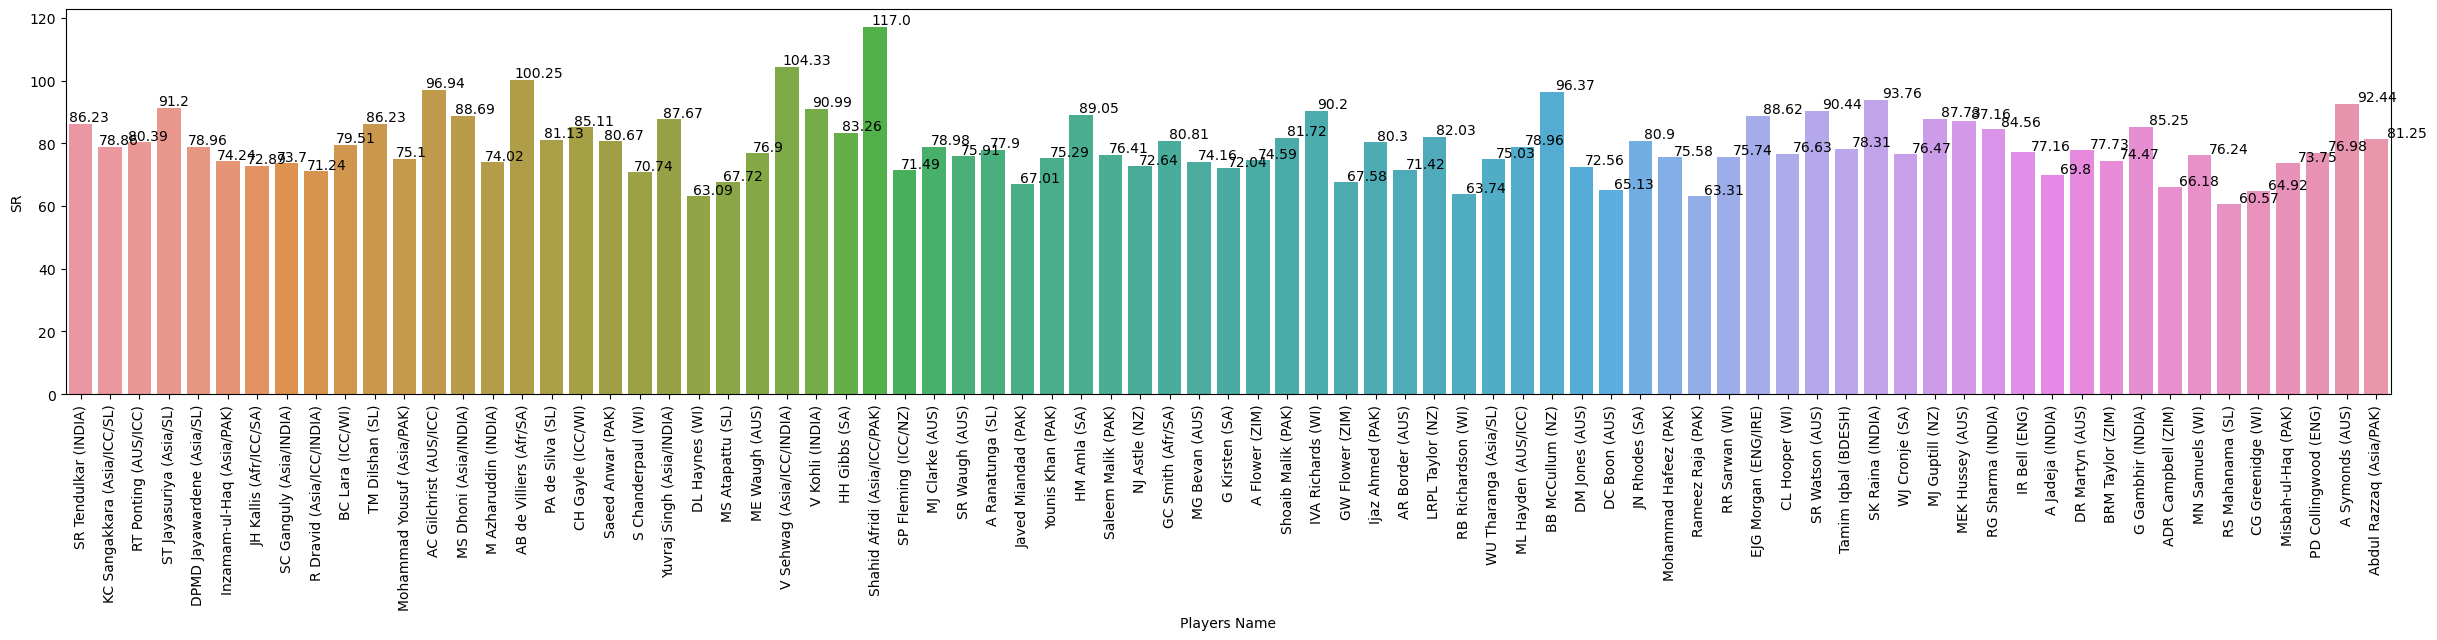

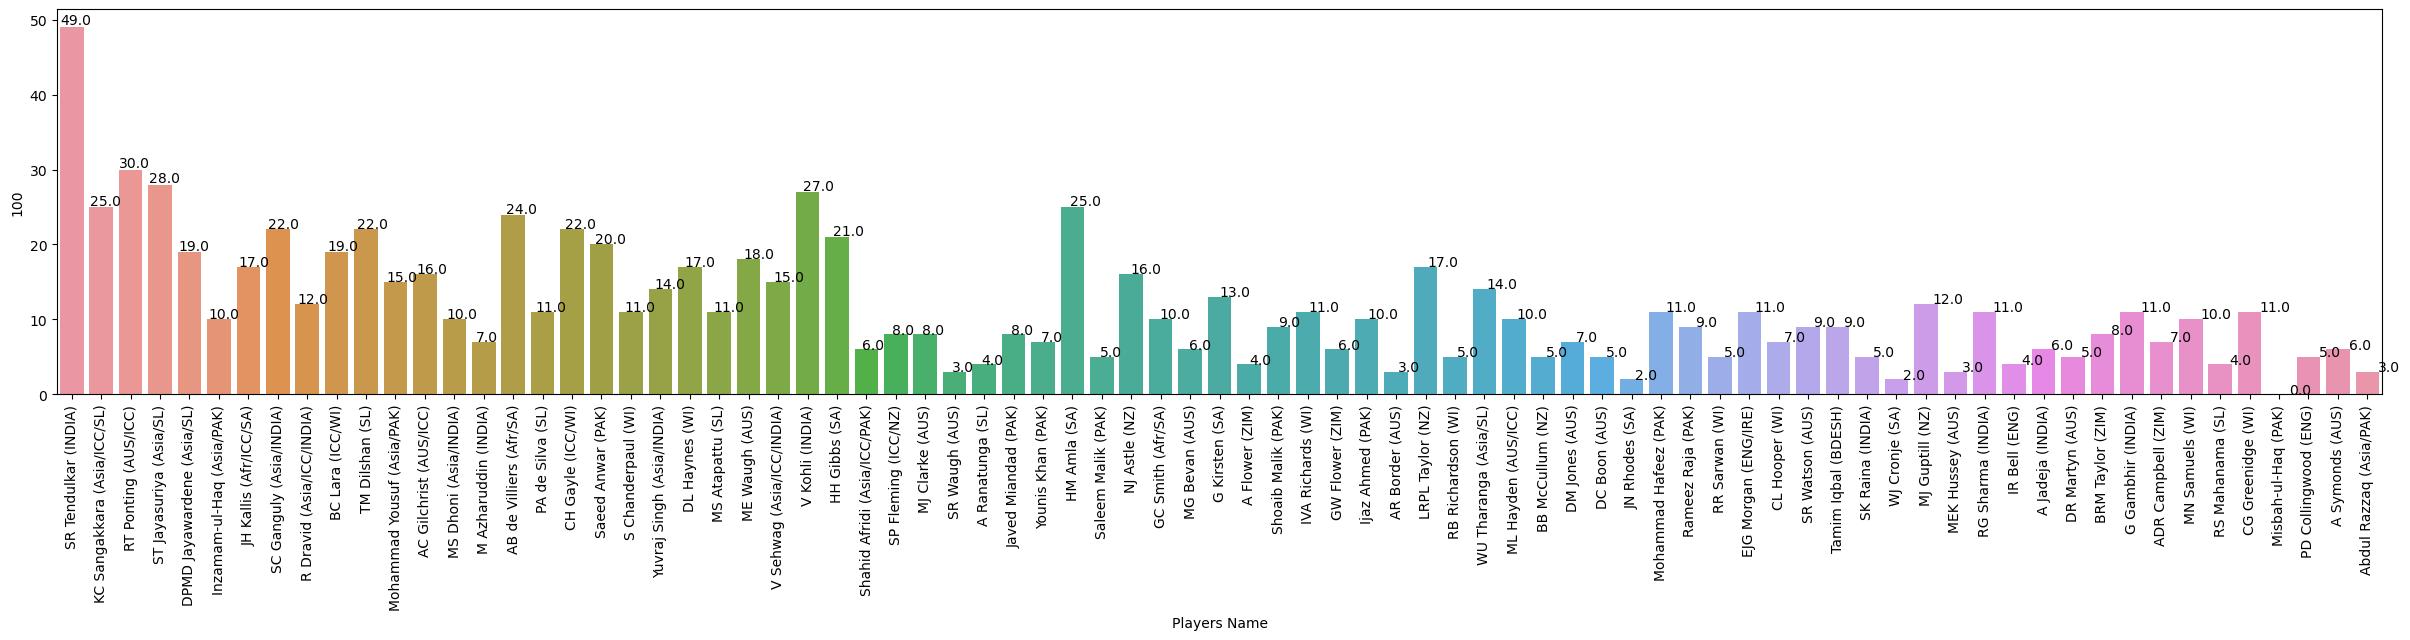

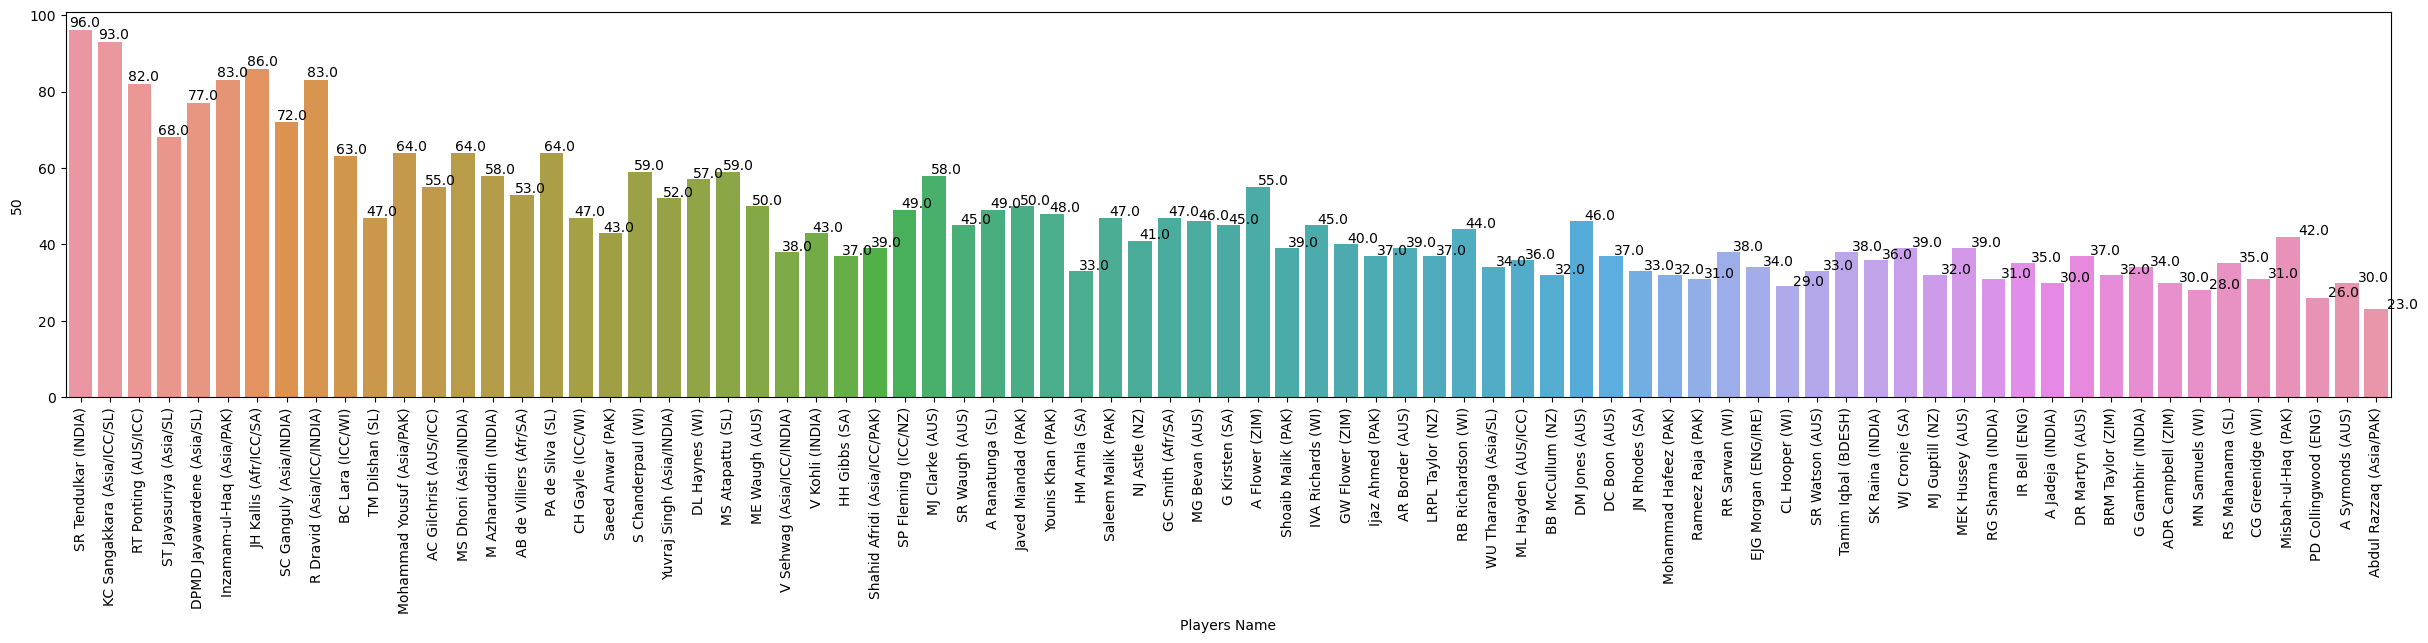

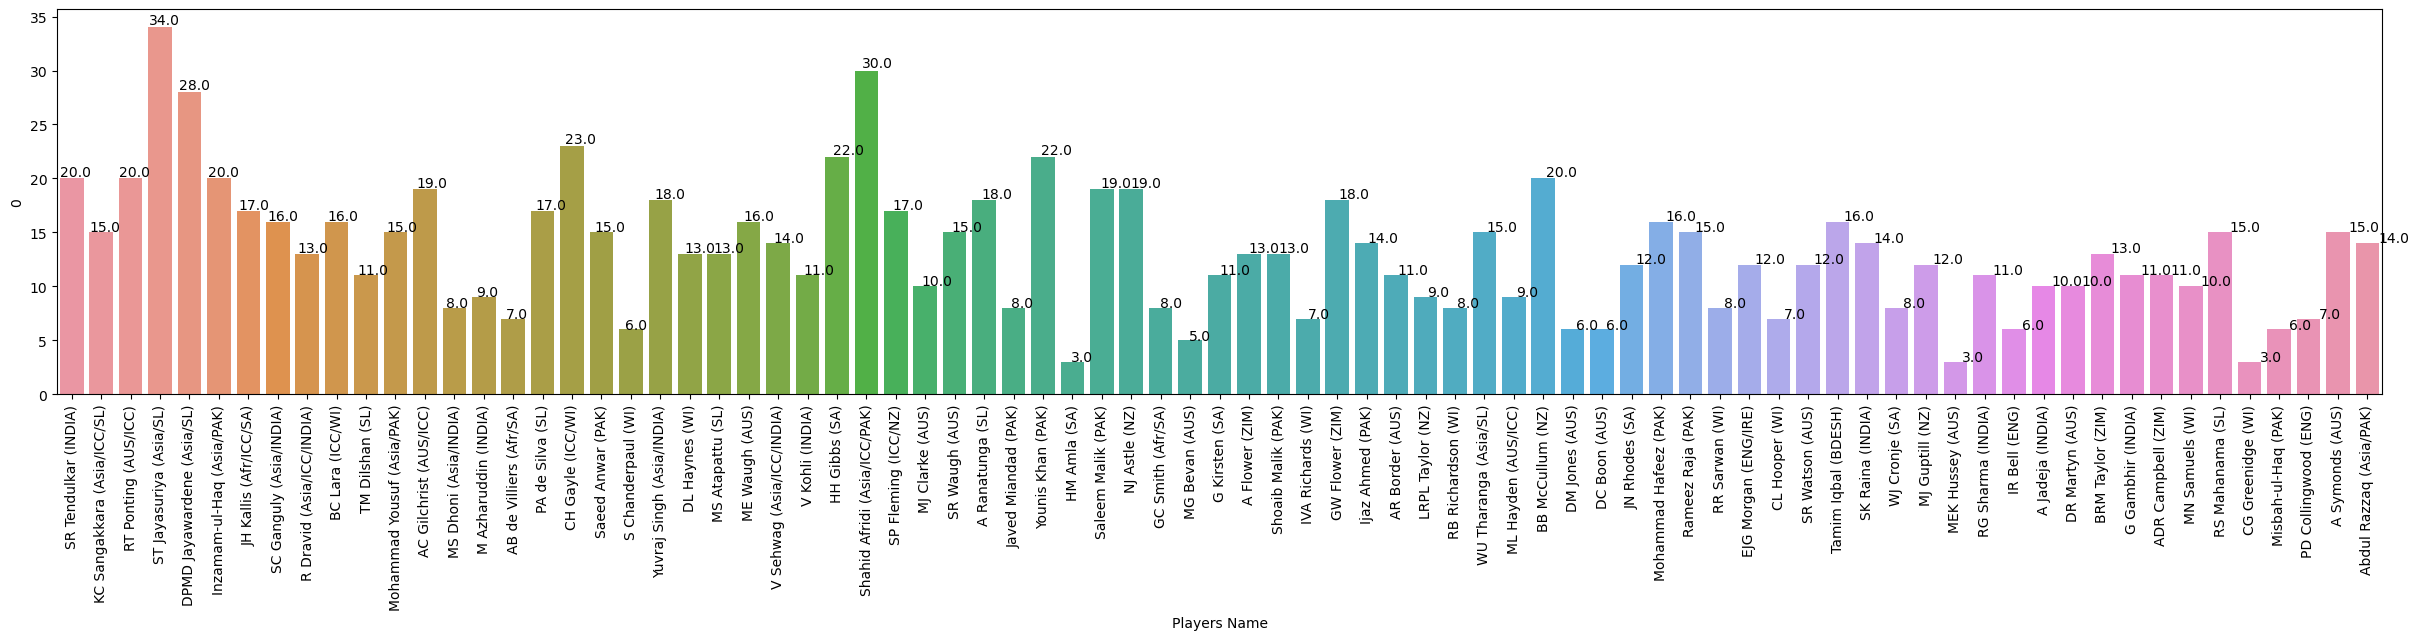

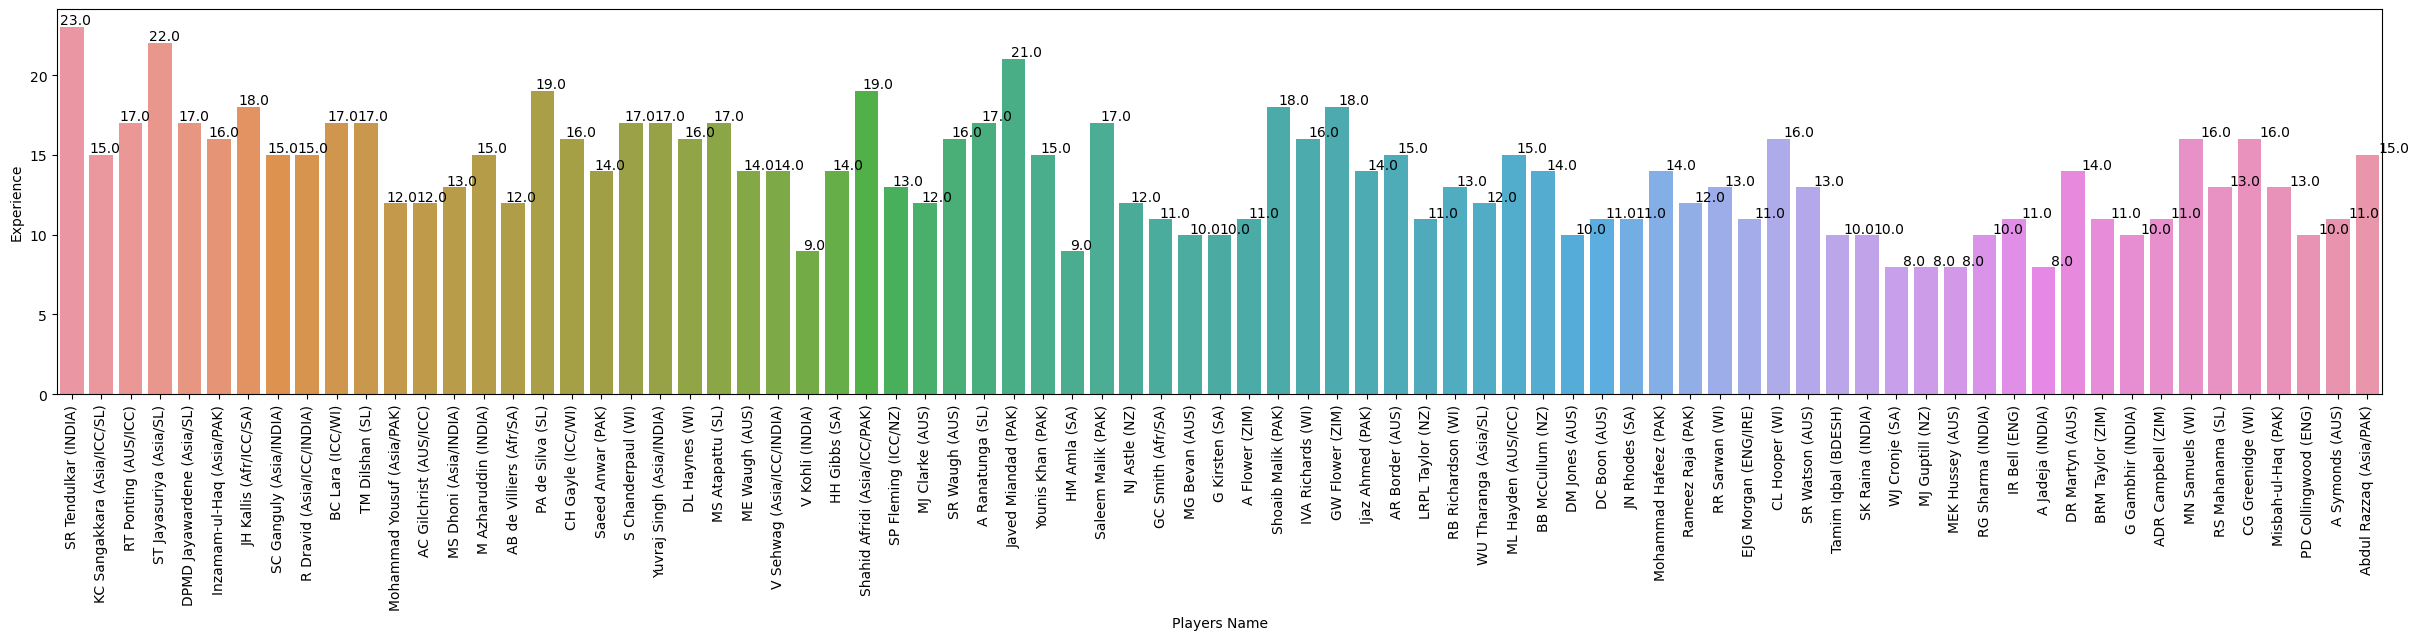

In [79]:
# Plotting Players vs All columns data

for col_name in col_list:
    if(df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
        plt.figure(figsize =(30,5))
        new_df = df[['Player', col_name]]
        ax = sns.barplot(x = 'Player', y= col_name, data = new_df)
        
        for i in ax.patches:
            ax.annotate(str(i.get_height()), (i.get_x()*1.01, i.get_height()*1.01)) # putting the height values
            
        ax.set(xlabel = 'Players Name', ylabel = col_name)
        plt.xticks(rotation =90)
        plt.show()

# Doing the same thing for top 10 players

Getting the data for top 10 Players


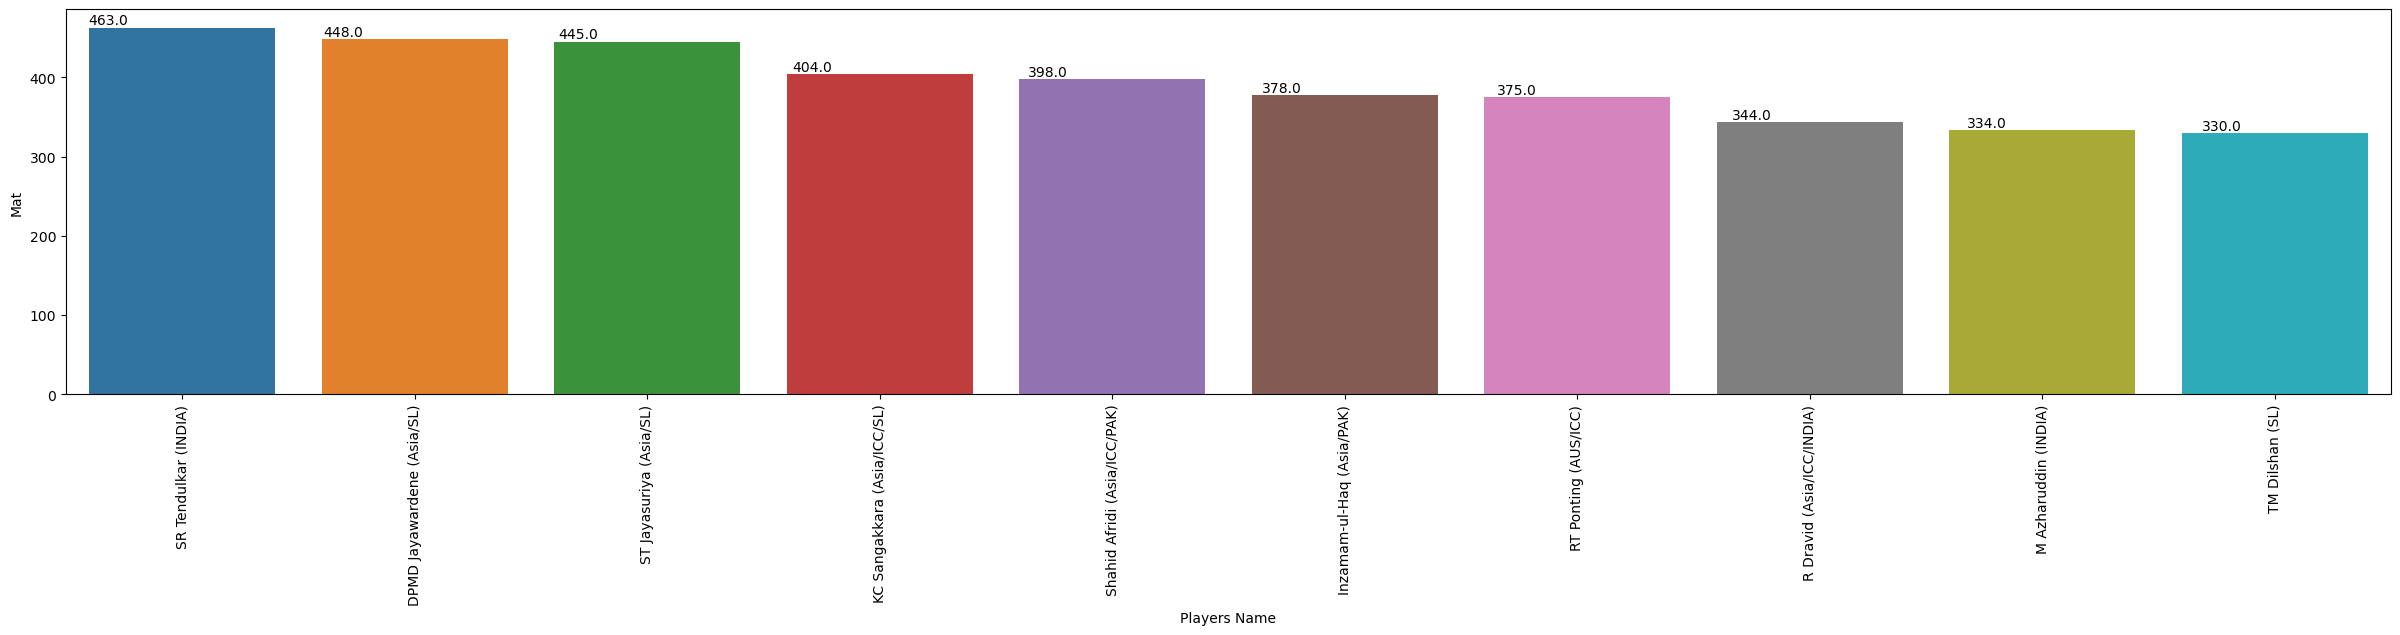

Getting the data for top 10 Players


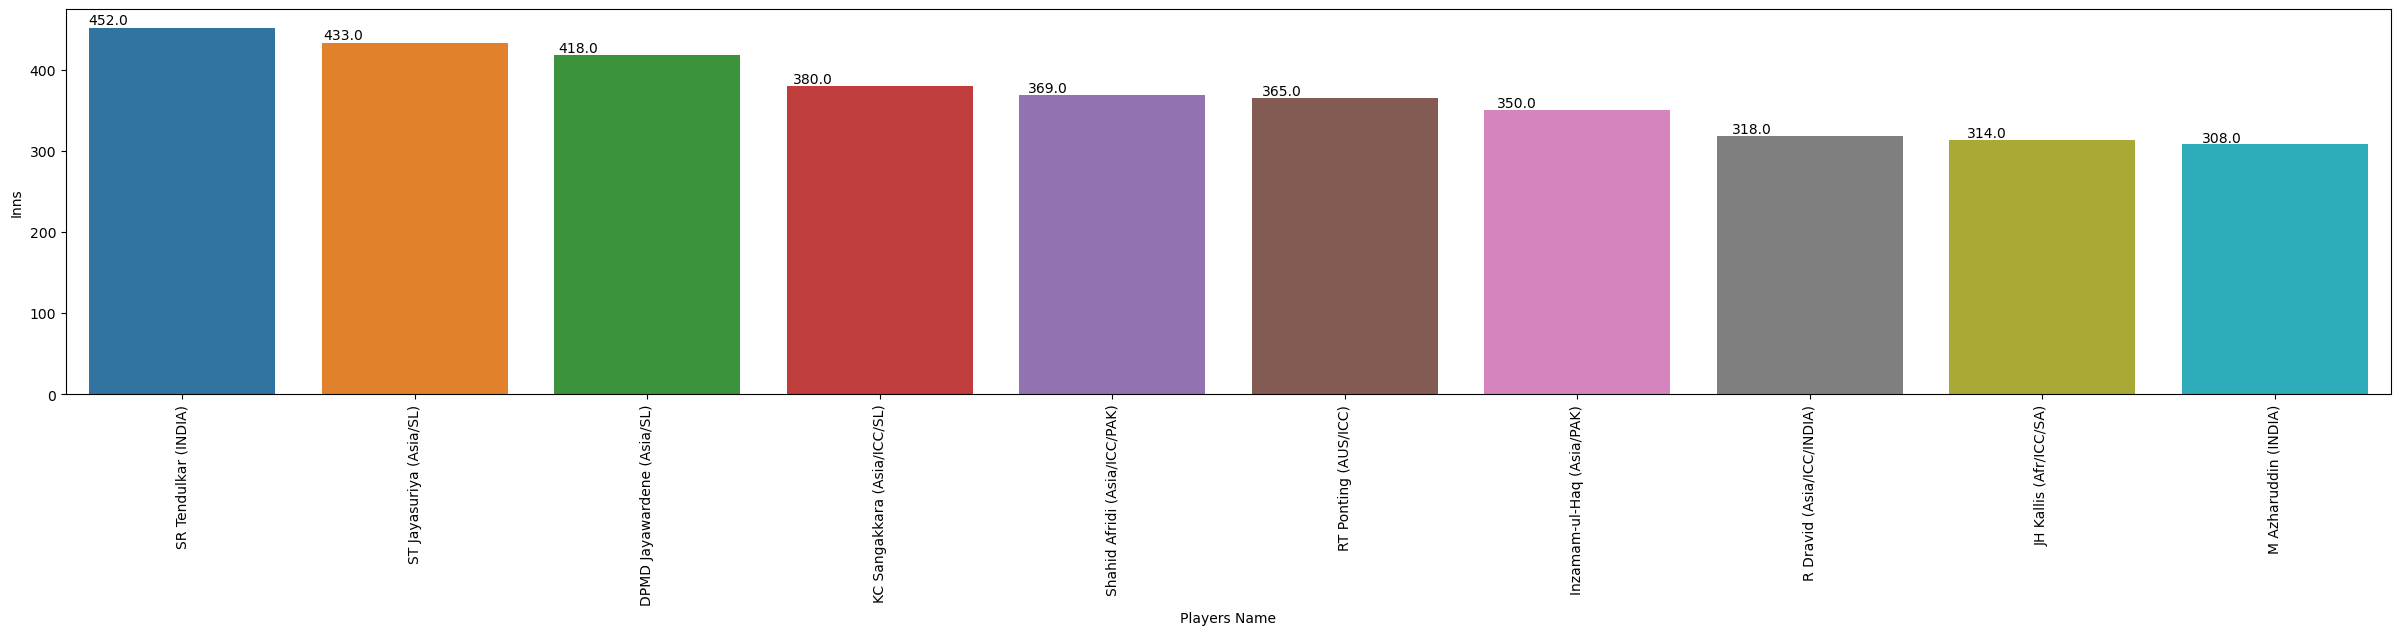

Getting the data for top 10 Players


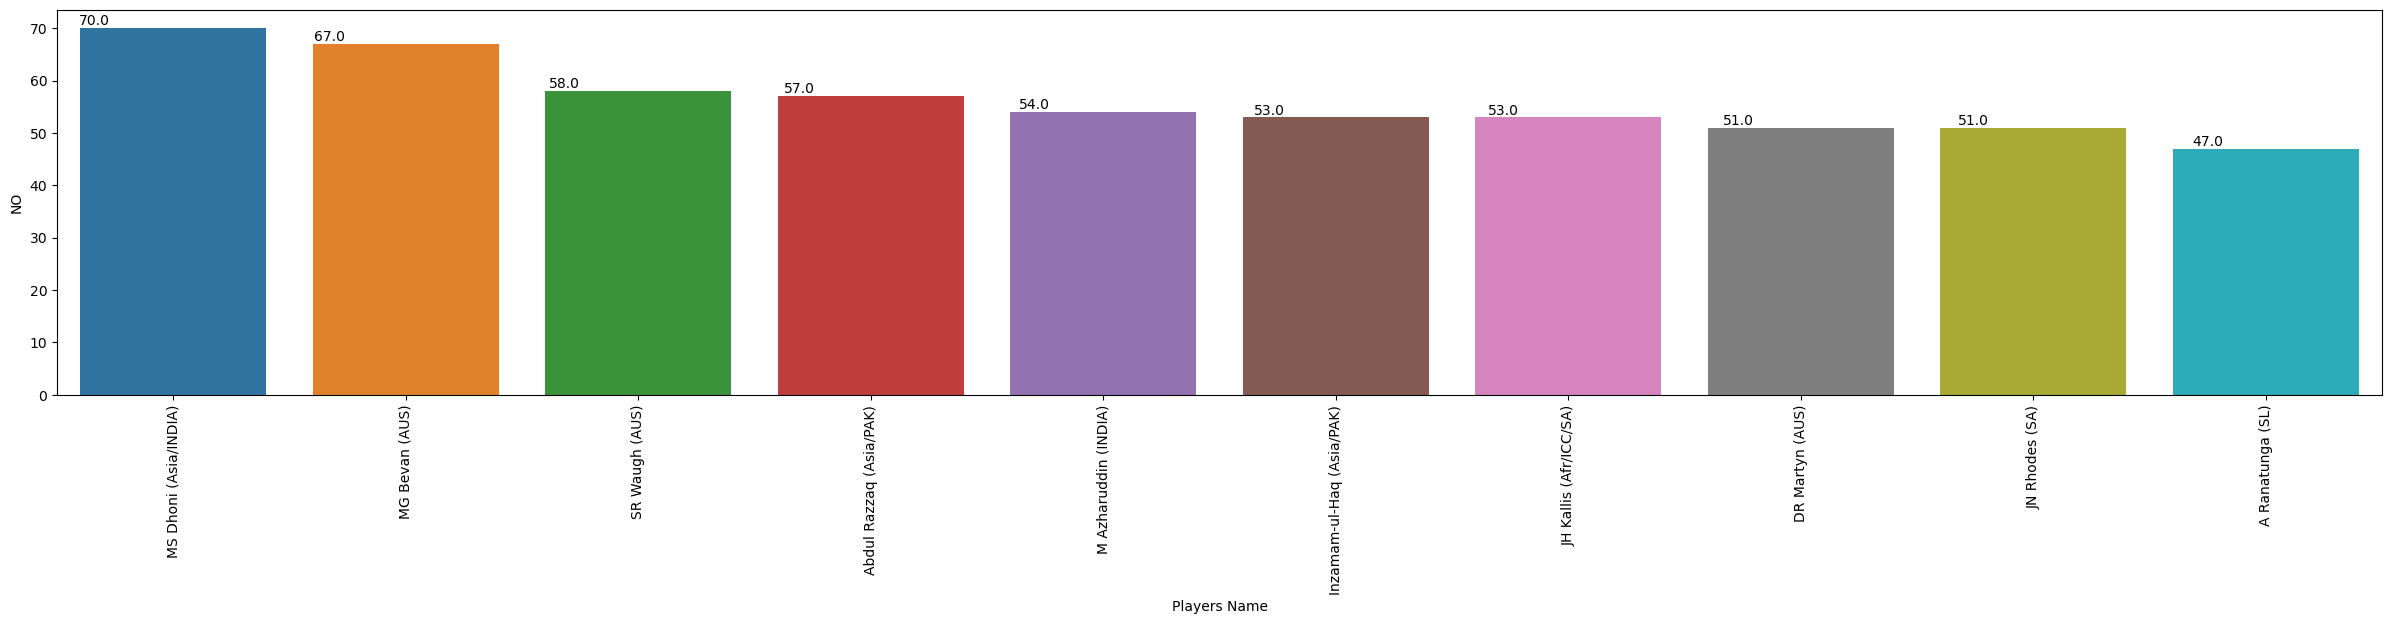

Getting the data for top 10 Players


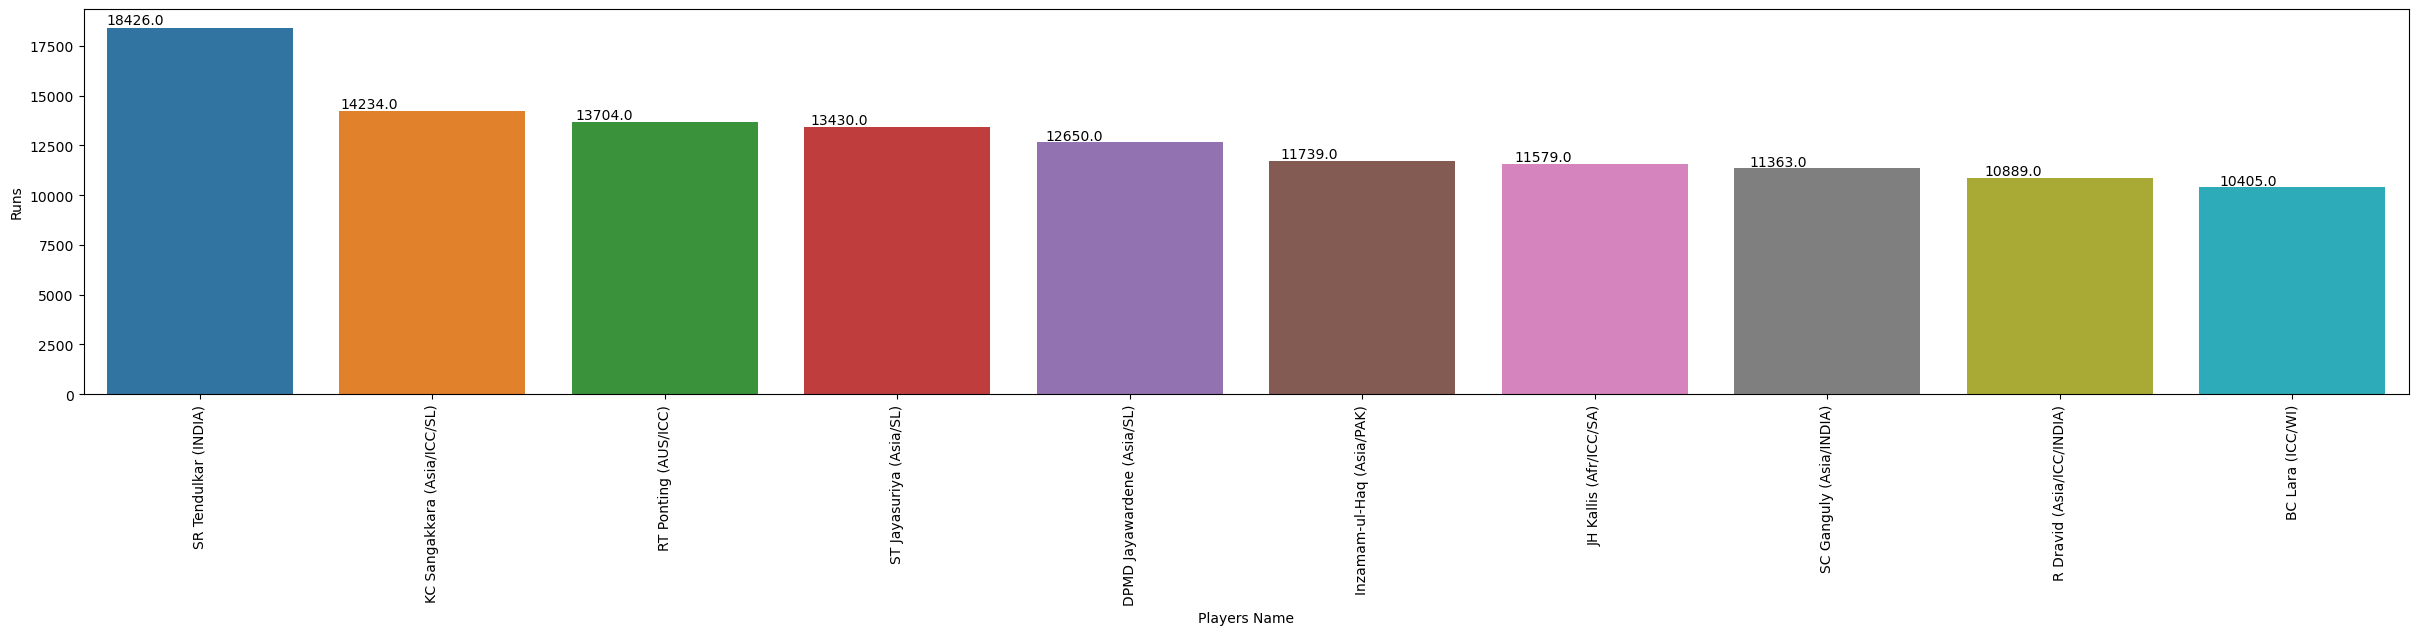

Getting the data for top 10 Players


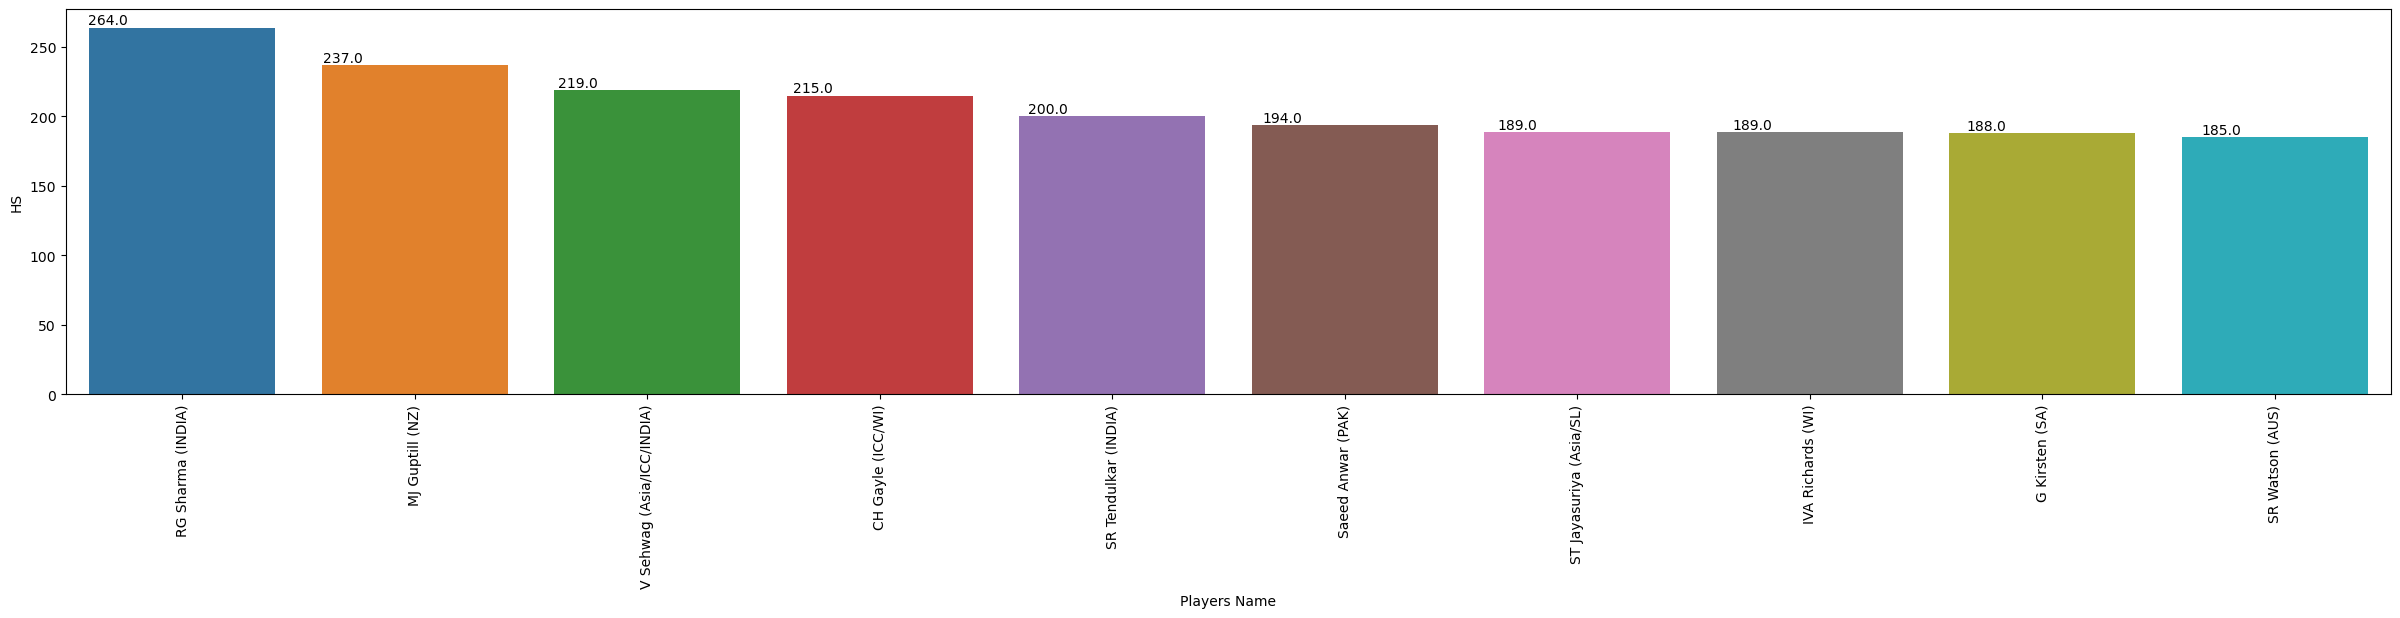

Getting the data for top 10 Players


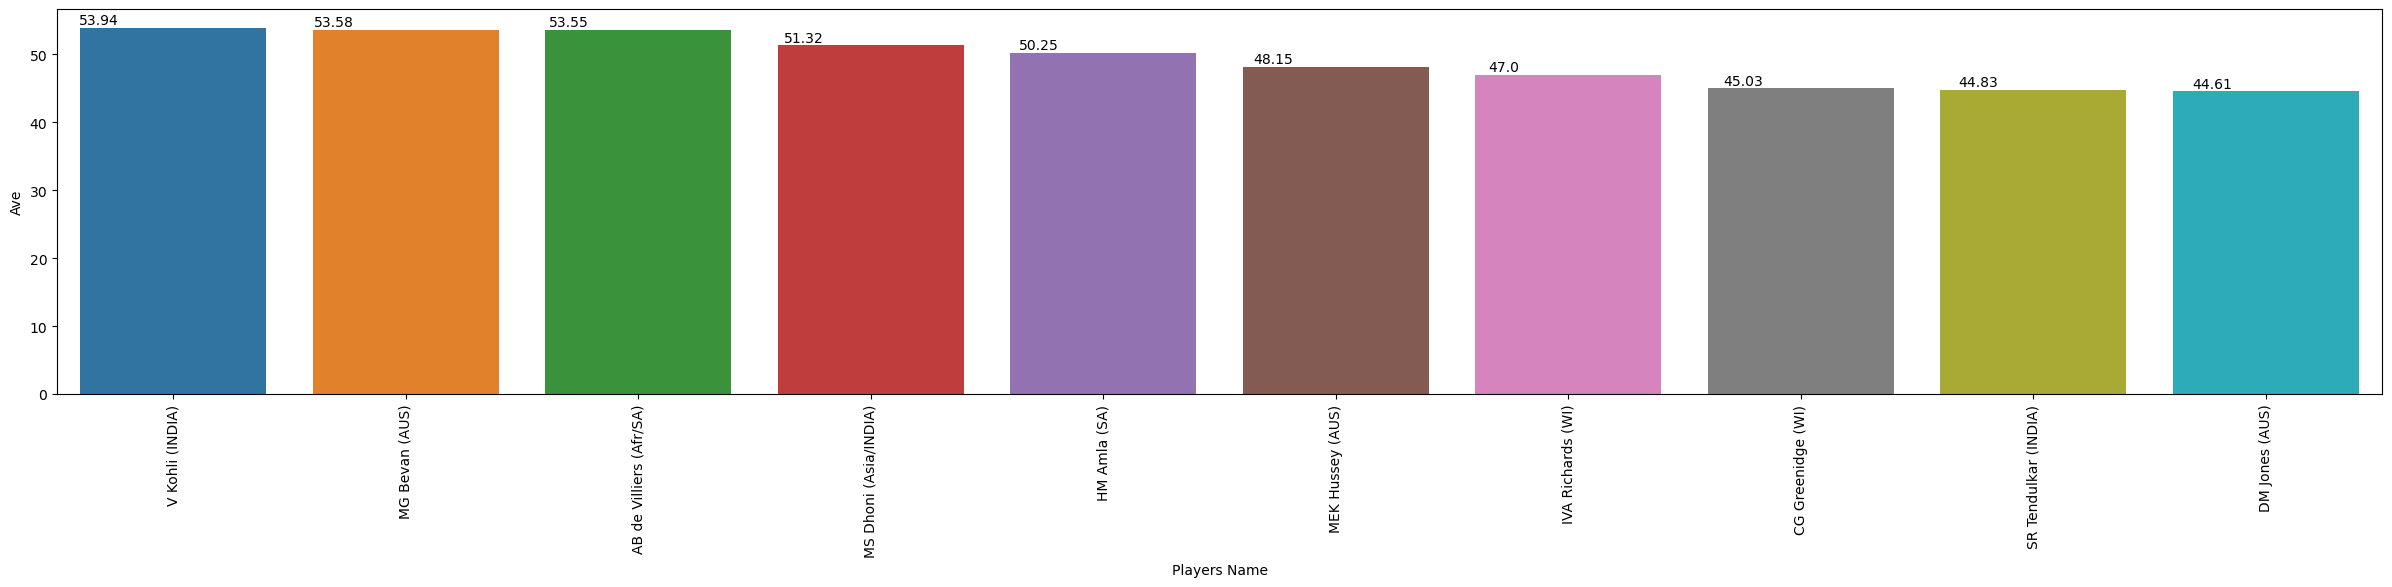

Getting the data for top 10 Players


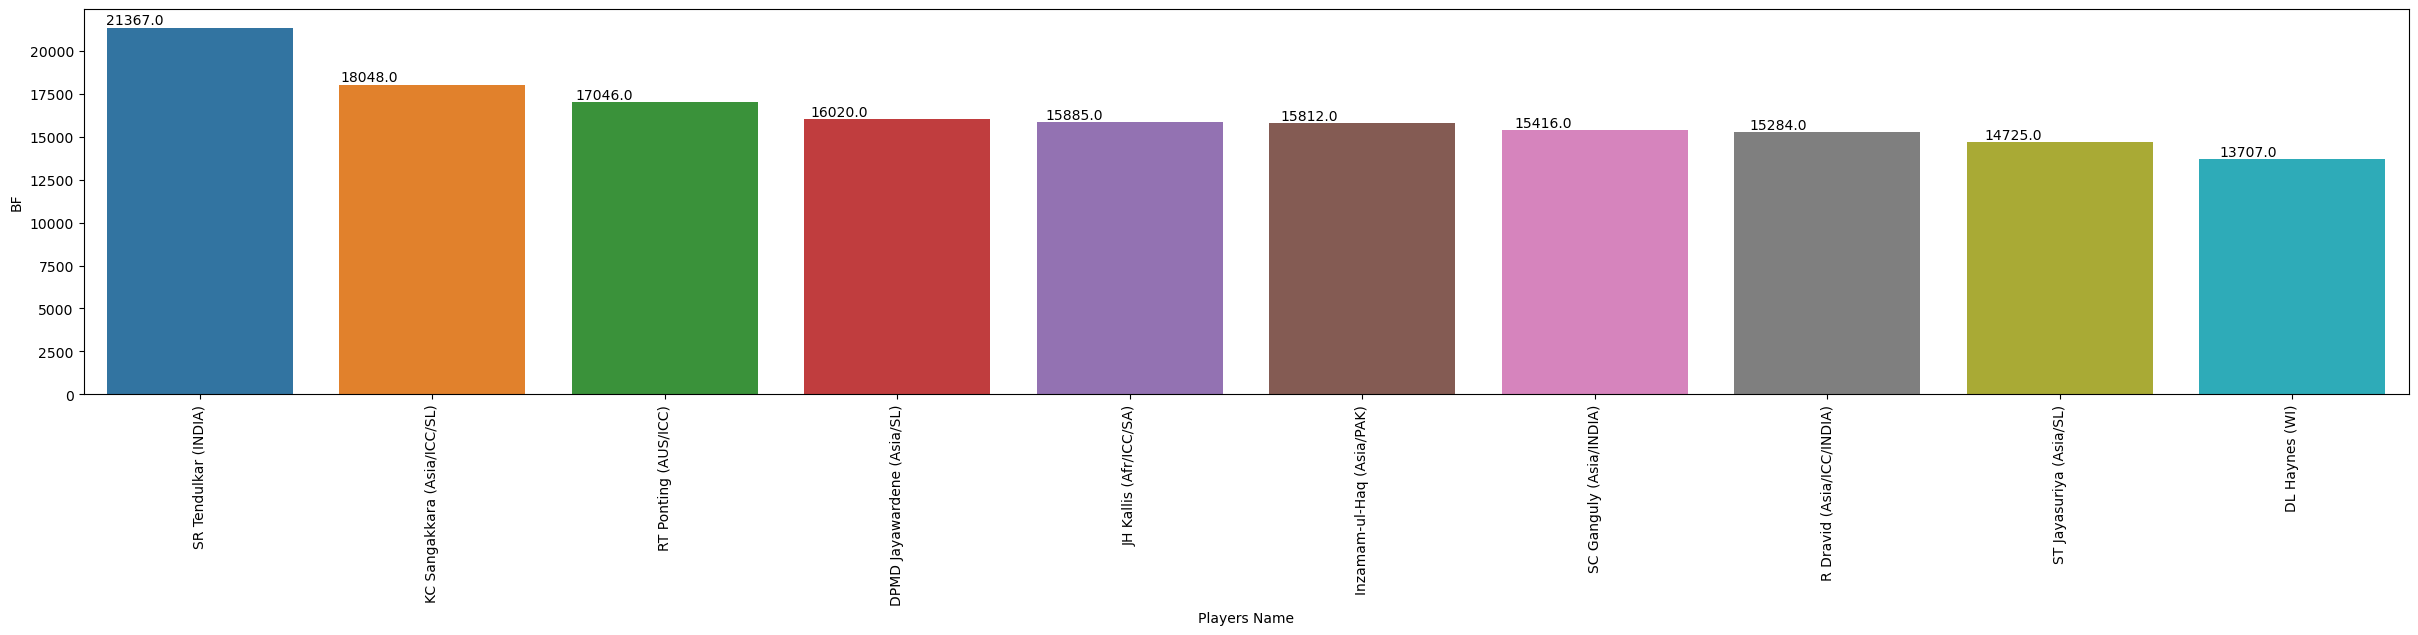

Getting the data for top 10 Players


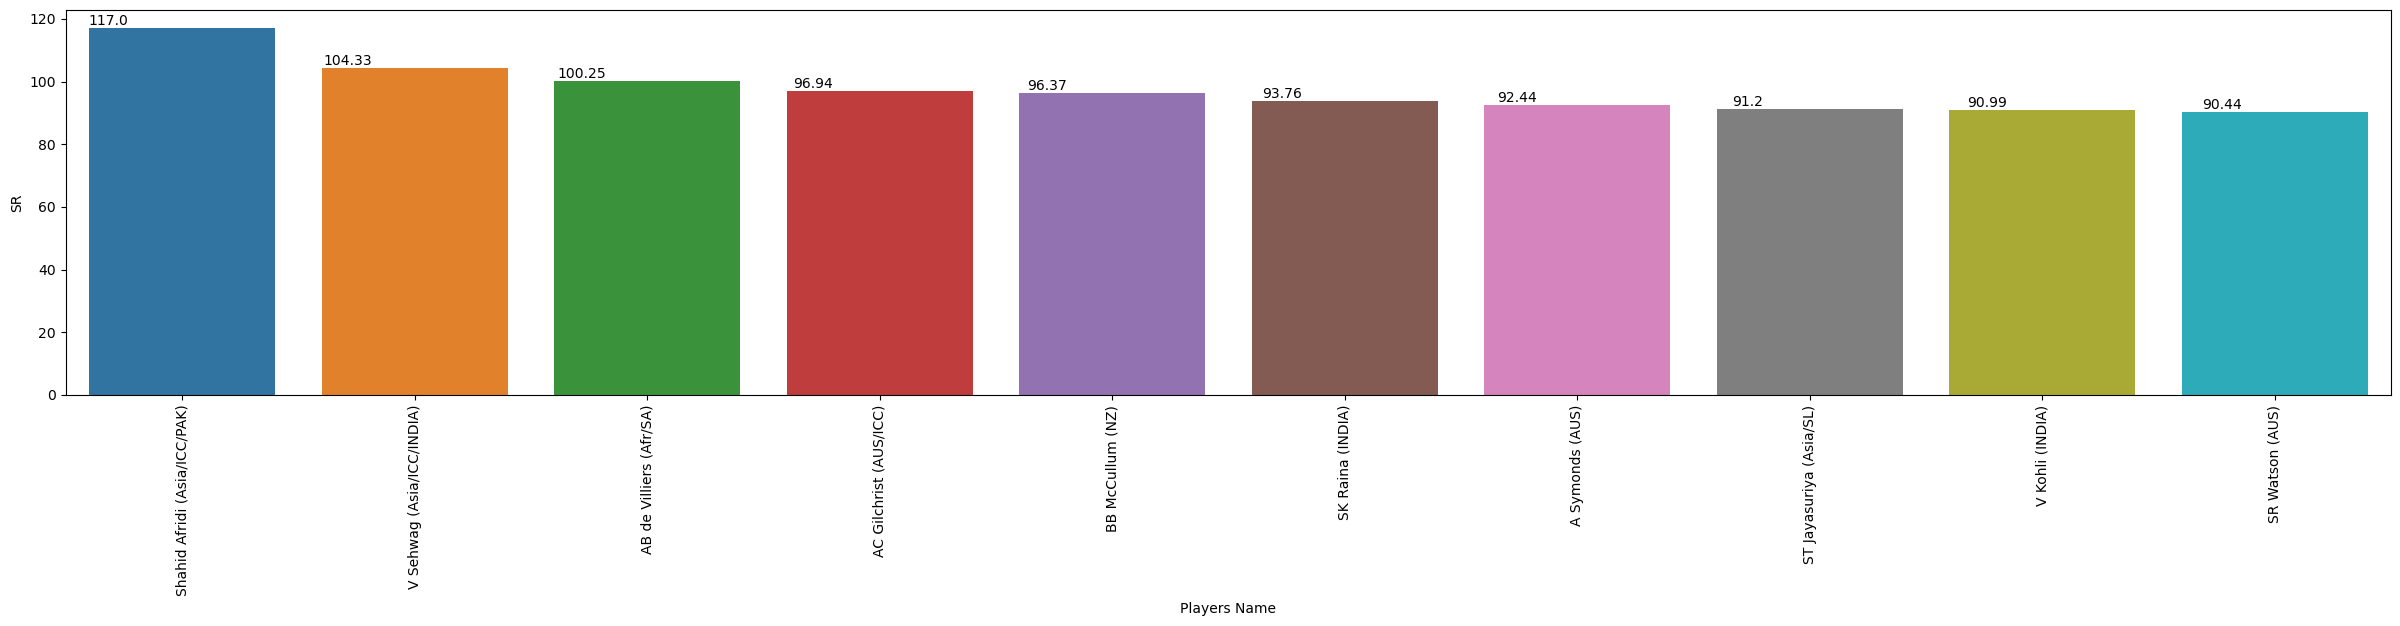

Getting the data for top 10 Players


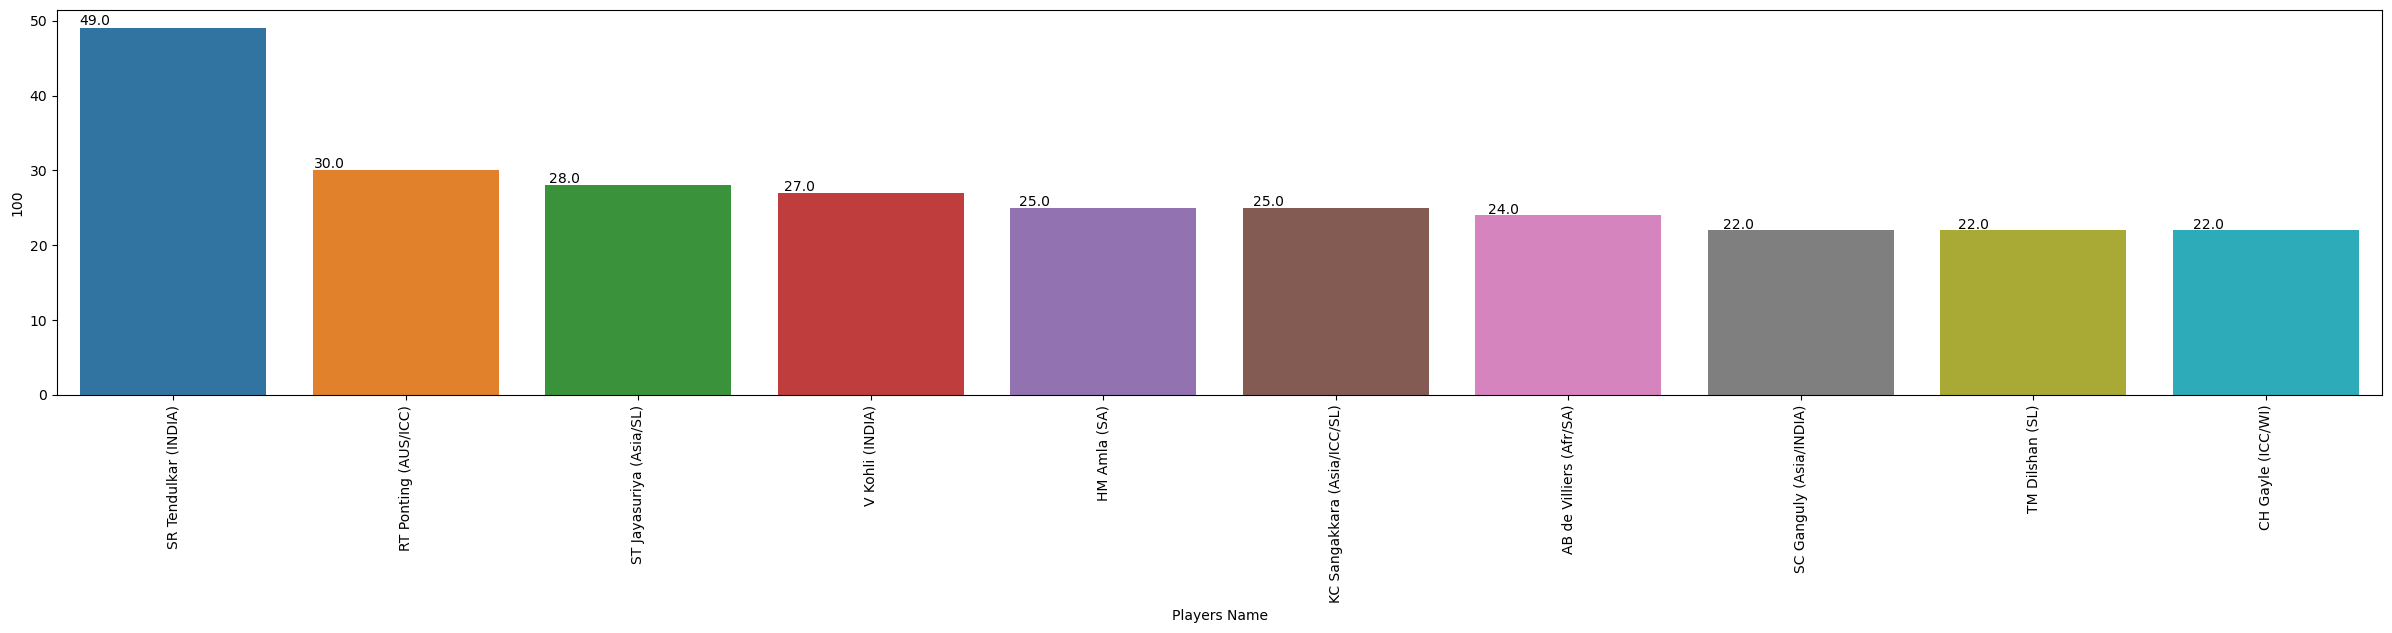

Getting the data for top 10 Players


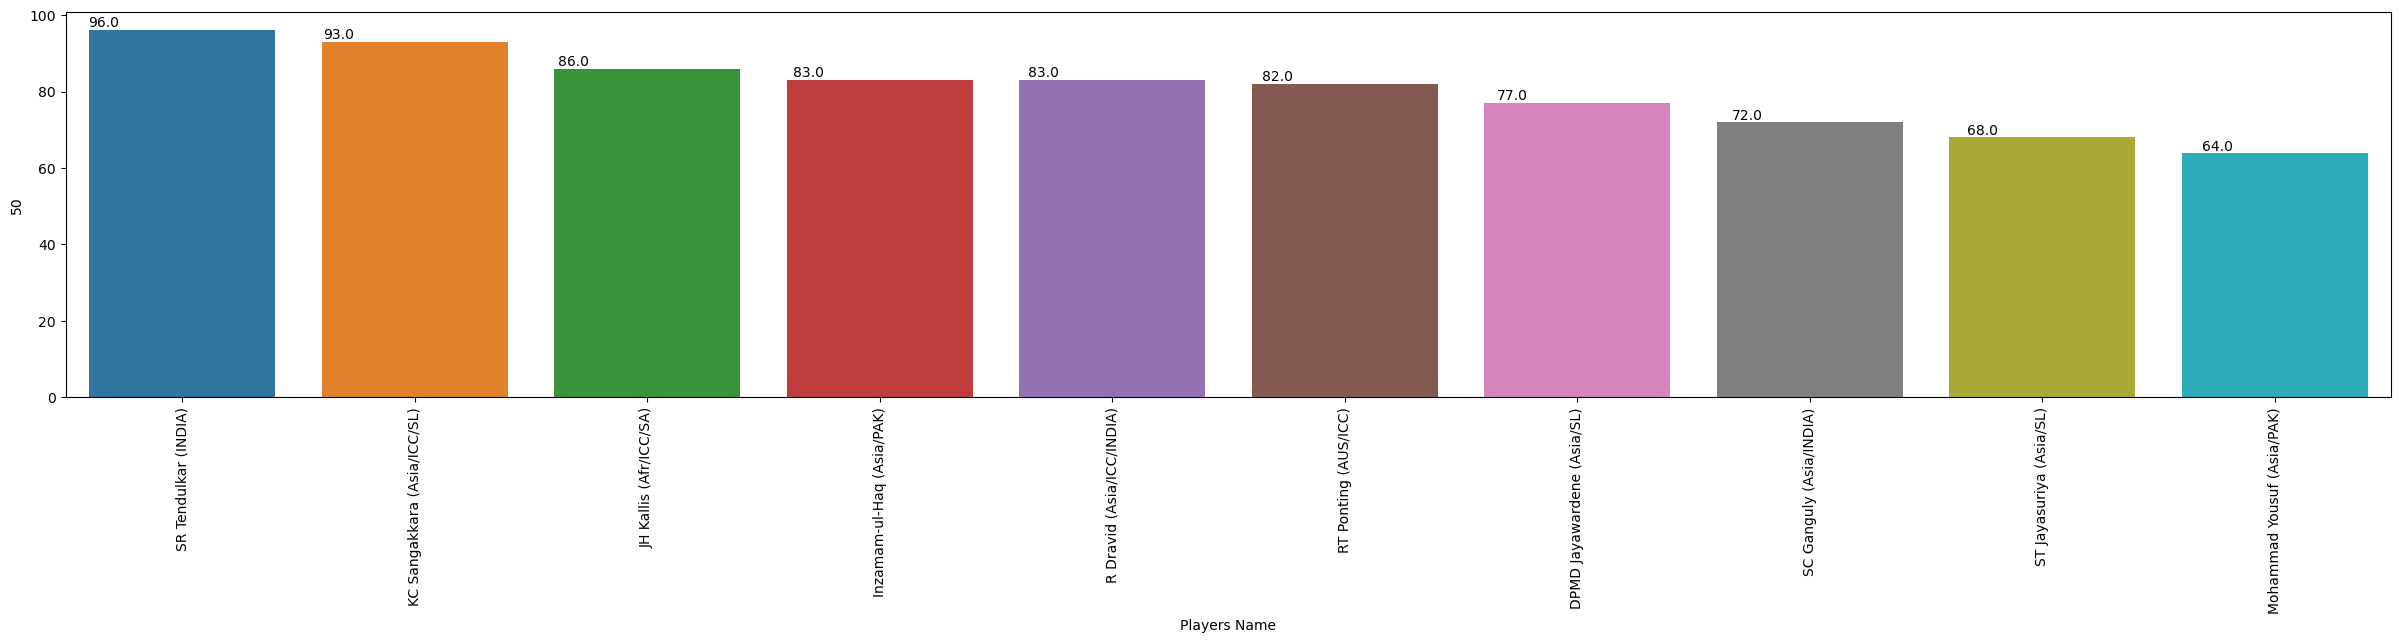

Getting the data for top 10 Players


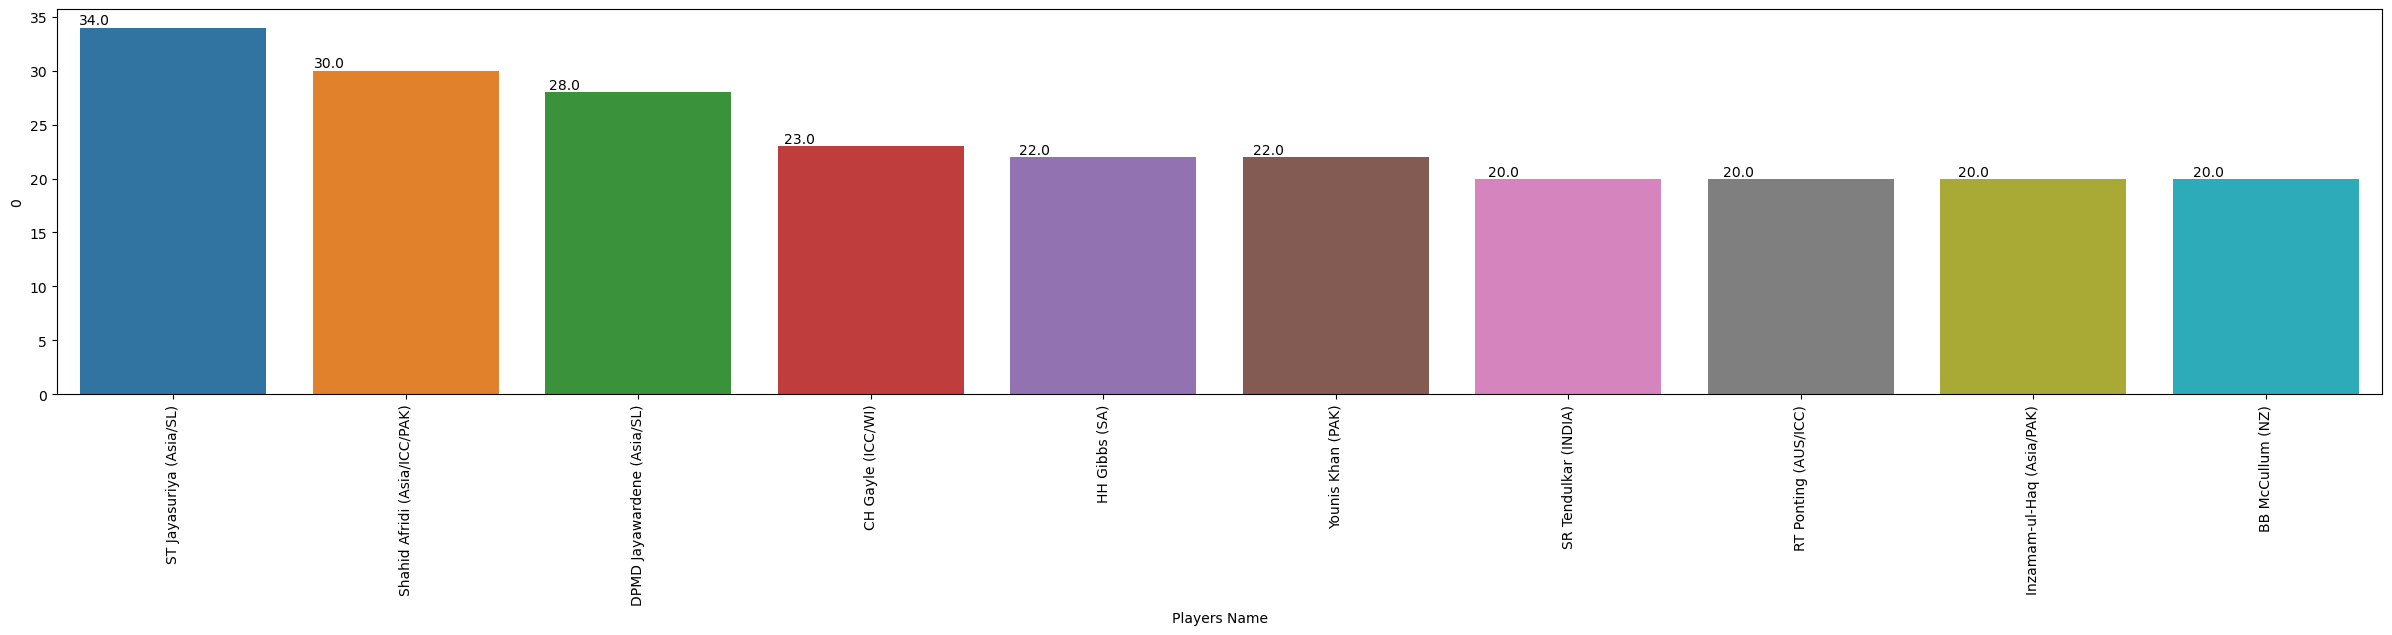

Getting the data for top 10 Players


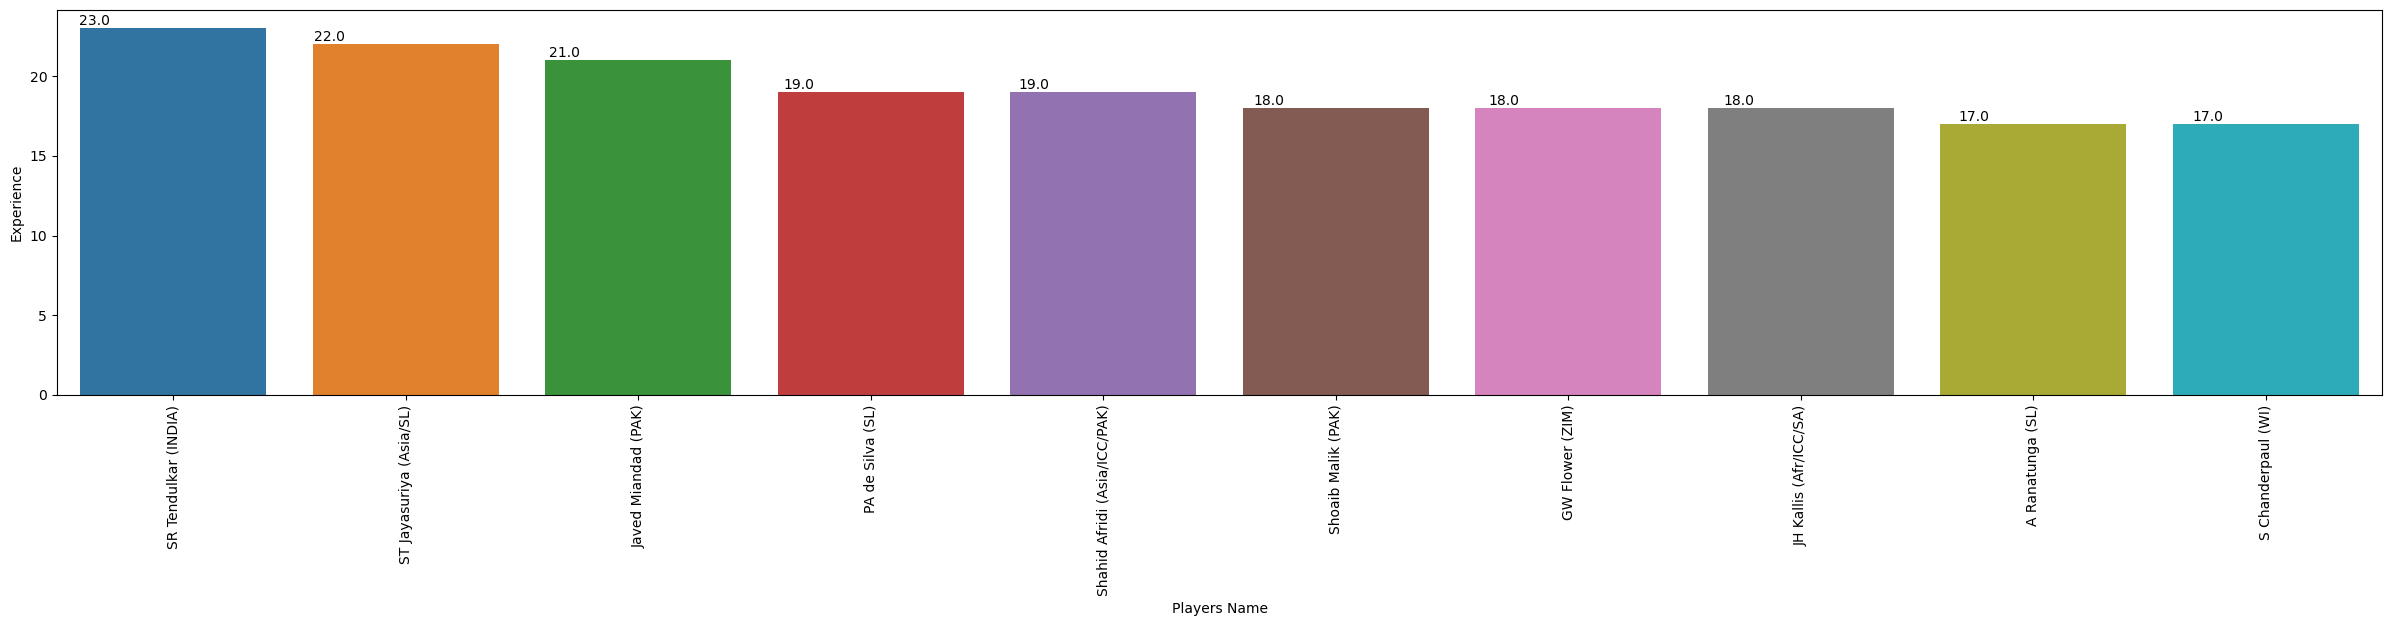

In [82]:
# Plotting Top 10 Players vs All columns data

for col_name in col_list:
    if(df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
        plt.figure(figsize =(30,5))
        print('Getting the data for top 10 Players')
        new_df10 = df[['Player', col_name]].sort_values(col_name, ascending = False ).head(10)
        ax = sns.barplot(x = 'Player', y= col_name, data = new_df10)
        
        for i in ax.patches:
            ax.annotate(str(i.get_height()), (i.get_x()*1.01, i.get_height()*1.01)) # putting the height values
            
        ax.set(xlabel = 'Players Name', ylabel = col_name)
        plt.xticks(rotation =90)
        plt.show()

# Step 6: Correlation

In [83]:
df.corr()

Mat      Inns        NO      Runs        HS       Ave  \
Mat         1.000000  0.990661  0.433992  0.864500  0.089757 -0.204473   
Inns        0.990661  1.000000  0.338788  0.896270  0.137518 -0.210776   
NO          0.433992  0.338788  1.000000  0.260526 -0.312561  0.241971   
Runs        0.864500  0.896270  0.260526  1.000000  0.335049  0.172331   
HS          0.089757  0.137518 -0.312561  0.335049  1.000000  0.250068   
Ave        -0.204473 -0.210776  0.241971  0.172331  0.250068  1.000000   
BF          0.798576  0.838206  0.275283  0.936736  0.192006  0.132089   
SR          0.183694  0.152891 -0.019291  0.146401  0.388540  0.098574   
100         0.466574  0.530225 -0.121577  0.776243  0.568856  0.345500   
50          0.777884  0.800381  0.350533  0.914436  0.180646  0.240353   
0           0.673924  0.697878 -0.101977  0.497139  0.222399 -0.536602   
Experience  0.687774  0.698699  0.233812  0.589688  0.051748 -0.238810   

                  BF        SR       100        50         0  Experience  
Mat         0.798576  0.183694  0.466574  0.777884  0.673924    0.687774  
Inns        0.838206  0.152891  0.530225  0.800381  0.697878    0.698699  
NO          0.275283 -0.019291 -0.121577  0.350533 -0.101977    0.233812  
Runs        0.936736  0.146401  0.776243  0.914436  0.497139    0.589688  
HS          0.192006  0.388540  0.568856  0.180646  0.222399    0.051748  
Ave         0.132089  0.098574  0.345500  0.240353 -0.536602   -0.238810  
BF          1.000000 -0.196835  0.658980  0.933328  0.402524    0.584006  
SR         -0.196835  1.000000  0.257617 -0.047072  0.271291    0.000201  
100         0.658980  0.257617  1.000000  0.557369  0.338982    0.338881  
50          0.933328 -0.047072  0.557369  1.000000  0.357128    0.505346  
0           0.402524  0.271291  0.338982  0.357128  1.000000    0.503886  
Experience  0.584006  0.000201  0.338881  0.505346  0.503886    1.000000

In [87]:
# option for cmap colours

#from matplotlib import colormaps
#list(colormaps)

<Axes: >

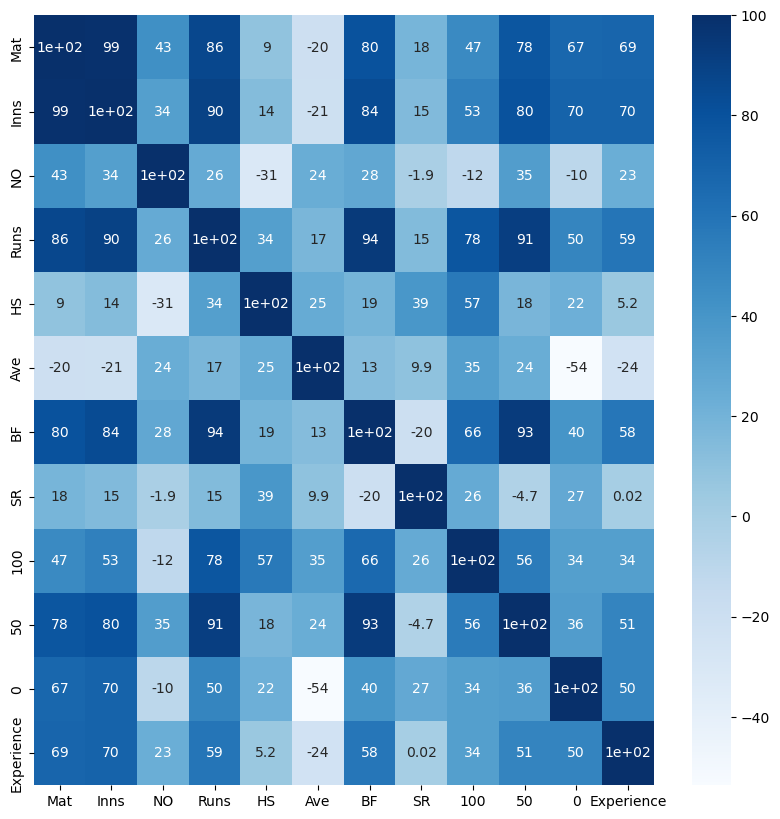

In [88]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr()*100, annot= True, cmap= 'Blues')

In [90]:
# Outliers Detection

In [92]:
df.describe().T

count         mean          std      min       25%      50%  \
Mat          79.0   245.075949    74.211716   128.00   188.000   232.00   
Inns         79.0   230.544304    70.321022   127.00   177.000   217.00   
NO           79.0    30.037975    14.421710     4.00    17.500    29.00   
Runs         79.0  7618.139241  2551.873313  5080.00  5759.000  6798.00   
HS           79.0   149.253165    31.285070    96.00   125.500   144.00   
Ave          79.0    38.523291     5.919093    23.57    34.600    37.87   
BF           79.0  9684.455696  3193.835825  5504.00  7393.500  9134.00   
SR           79.0    79.295316     9.925307    60.57    73.725    77.73   
100          79.0    11.556962     8.092014     0.00     6.000    10.00   
50           79.0    46.443038    16.351701    23.00    34.500    42.00   
0            79.0    13.253165     5.925755     3.00     9.000    13.00   
Experience   79.0    13.746835     3.310699     8.00    11.000    14.00   

                  75%       max  
Mat           281.500    463.00  
Inns          261.500    452.00  
NO             40.000     70.00  
Runs         8739.500  18426.00  
HS            167.500    264.00  
Ave            41.845     53.94  
BF          10976.000  21367.00  
SR             85.180    117.00  
100            15.500     49.00  
50             54.000     96.00  
0              16.000     34.00  
Experience     16.000     23.00

<Axes: >

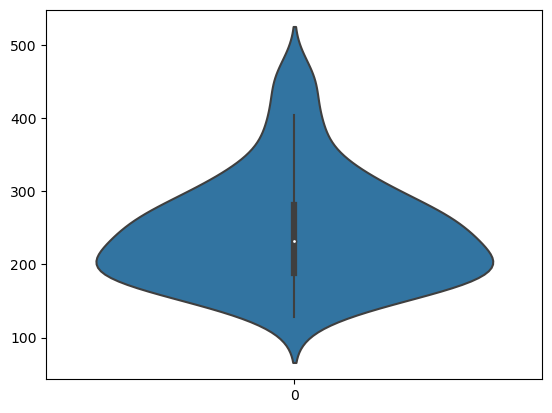

In [93]:
sns.violinplot(df.Mat)

<Axes: >

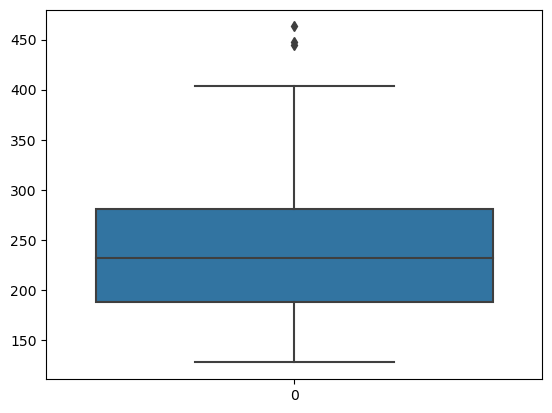

In [94]:
sns.boxplot(df.Mat)

In [96]:
# We have to make the violinplot for each columns and then if any outliers is detected eliminate it

# Step 7:  Data Modelling and Model making

In [97]:
# Drop the players column as final dataframe should only have numeric values

df_drop = df.copy()
player = df_drop.pop('Player')
player

0            SR Tendulkar (INDIA)
1     KC Sangakkara (Asia/ICC/SL)
2            RT Ponting (AUS/ICC)
3         ST Jayasuriya (Asia/SL)
4      DPMD Jayawardene (Asia/SL)
                 ...             
74              CG Greenidge (WI)
75            Misbah-ul-Haq (PAK)
76           PD Collingwood (ENG)
77                A Symonds (AUS)
78        Abdul Razzaq (Asia/PAK)
Name: Player, Length: 79, dtype: object

In [98]:
df_drop

Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  50   0  Experience
0   463   452  41  18426  200  44.83  21367  86.23   49  96  20          23
1   404   380  41  14234  169  41.98  18048  78.86   25  93  15          15
2   375   365  39  13704  164  42.03  17046  80.39   30  82  20          17
3   445   433  18  13430  189  32.36  14725  91.20   28  68  34          22
4   448   418  39  12650  144  33.37  16020  78.96   19  77  28          17
..  ...   ...  ..    ...  ...    ...    ...    ...  ...  ..  ..         ...
74  128   127  13   5134  133  45.03   7908  64.92   11  31   3          16
75  162   149  31   5122   96  43.40   6945  73.75    0  42   6          13
76  197   181  37   5092  120  35.36   6614  76.98    5  26   7          10
77  198   161  33   5088  156  39.75   5504  92.44    6  30  15          11
78  265   228  57   5080  112  29.70   6252  81.25    3  23  14          15

[79 rows x 12 columns]

# Scaling the data 

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [101]:
# Fitting and transforming the data in to scaler option
df_scaled = sc.fit_transform(df_drop)
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [104]:
new_scaled_df = pd.DataFrame(df_scaled, columns = ['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0', 'Experience'])
new_scaled_df
                             

Mat      Inns        NO      Runs        HS       Ave        BF  \
0   2.955282  3.169333  0.764963  4.262328  1.632443  1.072294  3.681214   
1   2.155179  2.138915  0.764963  2.609117  0.635224  0.587725  2.635385   
2   1.761908  1.924245  0.625397  2.400099  0.474382  0.596226  2.319651   
3   2.711183  2.897417 -0.840046  2.292041  1.278591 -1.047909  1.588295   
4   2.751866  2.682747  0.625397  1.984430 -0.168986 -0.876185  1.996354   
..       ...       ...       ...       ...       ...       ...       ...   
74 -1.587674 -1.481860 -1.188961 -0.979677 -0.522838  1.106299 -0.559768   
75 -1.126598 -1.167010  0.067133 -0.984410 -1.713068  0.829159 -0.863213   
76 -0.651961 -0.709047  0.485831 -0.996241 -0.941027 -0.537836 -0.967512   
77 -0.638400 -0.995274  0.206699 -0.997819  0.217035  0.208570 -1.317278   
78  0.270191 -0.036412  1.881490 -1.000973 -1.198374 -1.500174 -1.081580   

          SR       100        50         0  Experience  
0   0.703152  4.656726  3.050057  1.145837    2.812787  
1  -0.044139  1.671888  2.865418  0.296671    0.380938  
2   0.110997  2.293729  2.188406  1.145837    0.988900  
3   1.207091  2.044992  1.326755  3.523501    2.508806  
4  -0.034000  0.925678  1.880674  2.504502    0.988900  
..       ...       ...       ...       ...         ...  
74 -1.457604 -0.069268 -0.950465 -1.741328    0.684919  
75 -0.562275 -1.437319 -0.273453 -1.231828   -0.227024  
76 -0.234765 -0.815478 -1.258197 -1.061995   -1.138967  
77  1.332823 -0.691110 -1.012011  0.296671   -0.834986  
78  0.198198 -1.064215 -1.442837  0.126837    0.380938  

[79 rows x 12 columns]

In [102]:
df_drop.columns

Index(['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100', '50', '0',
       'Experience'],
      dtype='object')

# Step 8: K-Means

In [105]:
from sklearn.cluster import KMeans

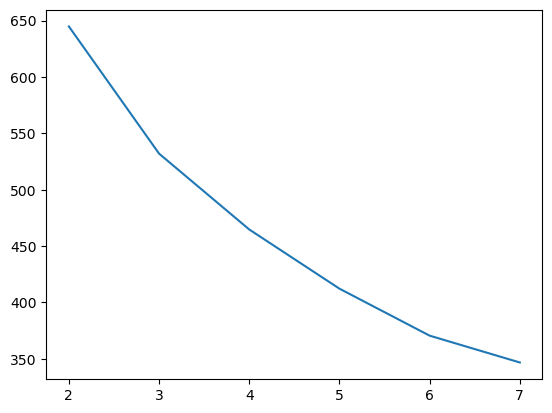

In [108]:
# Elbow curve for finding the optimal number of clusters

clusters = list(range(2,8))

ssd = []

for num_clusters in clusters:
    model_cluster = KMeans(n_clusters = num_clusters, max_iter = 150, random_state= 50)
    model_cluster.fit(df_scaled)
    ssd.append(model_cluster.inertia_)
    
plt.plot(clusters, ssd)

In [110]:
from sklearn.metrics import silhouette_score

# This method is used for finding the optimal number of clusters precisely

range_cluster = [2,3,4,5,7,8]

for x in range_cluster:
    kmeans = KMeans(n_clusters= x, max_iter= 50, random_state= 100)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    
    sil_avg = silhouette_score(df_scaled, cluster_labels)
    print(f'For n_clusters{x}, the silhouette score is {sil_avg}')
    

For n_clusters2, the silhouette score is 0.3136820966012298
For n_clusters3, the silhouette score is 0.2145859150936642
For n_clusters4, the silhouette score is 0.20204593720906122
For n_clusters5, the silhouette score is 0.19739178762602935
For n_clusters7, the silhouette score is 0.16238963860171832
For n_clusters8, the silhouette score is 0.18283595846005601


# Since the values for n = 3 is higher than the value of n=4, so we are going ahead with 4.

# Lesser the silhouette score , better the silhouette score

In [113]:
# Final model creationg

clusters = KMeans(n_clusters = 4, max_iter = 50, random_state= 50)

clusters.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [114]:
clusters.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [115]:
# assigning the labels to df

df['Cluster Assigned'] = clusters.labels_
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Experience  Cluster Assigned  
0  86.23   49  96  20          23                 3  
1  78.86   25  93  15          15                 3  
2  80.39   30  82  20          17                 3  
3  91.20   28  68  34          22                 3  
4  78.96   19  77  28          17                 3

In [116]:
# how many data point in a cluster

df['Cluster Assigned'].value_counts()

0    27
2    22
1    21
3     9
Name: Cluster Assigned, dtype: int64